# Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In [3]:
df_places = pd.read_csv('./places_courchevel.csv')
df_places.head()

,id,nom,nbAvis,latitude,longitude,shape_gid,gtrip
0,265114,Au Rond-Point Pistes,3,45.414890,6.631468,53660,196714
1,2038947,le p tit drink,18,45.415930,6.635808,53660,187262
2,219808,Courcheneige,184,45.404945,6.633761,53660,187262
3,219805,Le Chabichou,167,45.416412,6.628457,53660,187262
4,293193,Hotel Des Neiges,75,45.415100,6.633700,53660,187262


C:\Users\yh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


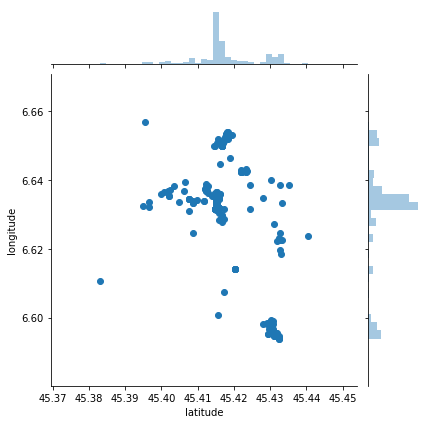

In [4]:
sns.jointplot(x=df_places['latitude'], y=df_places['longitude'], kind='scatter')

# Analysis 

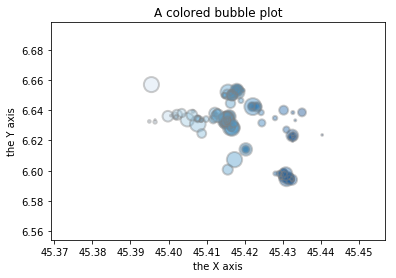

In [5]:
# create data
x = df_places['latitude']
y = df_places['longitude']
z = df_places['nbAvis']

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()

In [6]:
import folium

print(folium.__version__)

0.7.0


In [7]:
from folium.plugins import HeatMap

#m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
m = folium.Map([45.4167,6.65], zoom_start=13)

HeatMap(df_places[['latitude', 'longitude', 'nbAvis']].values.tolist()).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [8]:
df_reviews = pd.read_csv('./reviews_courchevel.csv')
df_reviews.head()

,id,idplace,idauteur,note,date_review,date_visit,langue
0,174009641,265114,2EE93DB6F4AC7C346BE4E36CFC0D3663,1,2013-08-25,2013-03-01,fra
1,6766587,265114,A92BA3B3E9BA2062DB7AF007D6D40BA4,5,2007-02-09,2007-01-01,eng
2,6762535,265114,D687BC1A8E18B18D3C59C298A52ED945,5,2007-02-07,0000-00-00,eng
3,374747479,2038947,BA38E61F6B4B56CEA0AF9DFBD0C9AD31,4,2016-05-20,2016-01-01,fra
4,360229404,2038947,65118ADB91DD4FC098CA3D574999E798,4,2016-03-31,2016-03-01,fra


# Volume per place using reviews

In [9]:
nb_places = len(df_places)
nb_places

244

In [10]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.head()

,id,latitude,longitude
0,265114,45.414890,6.631468
1,2038947,45.415930,6.635808
2,219808,45.404945,6.633761
3,219805,45.416412,6.628457
4,293193,45.415100,6.633700


In [11]:
tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])

for i in range(nb_places):
    tmp_volume["volume"][i] = len(df_reviews[df_reviews["idplace"] == df_tmp_places["id"][i] ])

In [12]:
tmp_volume

,volume
0,3
1,18
2,185
3,168
4,0
5,39
6,170
7,78
8,10
9,106


# Using reviews in time

In [22]:
from datetime import datetime

In [23]:
def add_one_month(date):
    if date.month < 12 : 
        return date.replace(month=date.month+1)
    else :
        return date.replace(month=1, year=date.year+1)

In [24]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.reset_index(inplace=True,drop=True)
nb_places = len(df_tmp_places)
df_tmp_places.head()

,id,latitude,longitude
0,265114,45.414890,6.631468
1,2038947,45.415930,6.635808
2,219808,45.404945,6.633761
3,219805,45.416412,6.628457
4,293193,45.415100,6.633700


In [16]:
# BEGINNING DATE : 2004-05-11 - ENDING DATE : 2016-12-04
date_from = datetime.strptime('2004-05-01', '%Y-%m-%d')
date_to = add_one_month(date_from) #datetime.strptime('2013-12-31', '%Y-%m-%d') 

# periodic_volumes is an array containing all volumes for each place, each month
# periodic_volumes is an array of arrays : [ [[latitude, longitude, volume],... ], ... ]
periodic_volumes =[] 

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 151 #https://www.calendrier-365.fr/calculez/11-05-2004_04-12-2016.html
for j in range(number_of_month) :
    
    # creating df volume
    tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])
    for i in range(nb_places):
        
        tmp_selected_reviews = df_reviews[(df_reviews["idplace"] == df_tmp_places["id"][i]) 
                                         & (df_reviews["date_review"] != "0000-00-00")]
        
        # Reinitializing index of dataframe :
        tmp_selected_reviews.reset_index(inplace=True,drop=True)
        
        bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])
        print("j : "+str(j)+" ; i : " + str(i))
        for k in range(len(tmp_selected_reviews)): 
            bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
            bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

        tmp_volume["volume"][i] = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
        

    
    # fusion avec df places
    df_result = pd.concat([df_tmp_places[["latitude","longitude"]], tmp_volume],axis=1) 
    
    # conversion en array
    tmp_array = df_result[df_result['volume'] != 0].values.tolist()
    
    # ajout à l'array globale
    periodic_volumes.append(tmp_array)
    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)

    
# calculer les volume sur un mois, ranger ca dans une array, faire pareil pour les mois suivants


j : 0 ; i : 0
j : 0 ; i : 1
j : 0 ; i : 2
j : 0 ; i : 3
j : 0 ; i : 4
j : 0 ; i : 5
j : 0 ; i : 6
j : 0 ; i : 7
j : 0 ; i : 8
j : 0 ; i : 9
j : 0 ; i : 10
j : 0 ; i : 11
j : 0 ; i : 12
j : 0 ; i : 13
j : 0 ; i : 14
j : 0 ; i : 15
j : 0 ; i : 16
j : 0 ; i : 17
j : 0 ; i : 18
j : 0 ; i : 19
j : 0 ; i : 20
j : 0 ; i : 21
j : 0 ; i : 22
j : 0 ; i : 23
j : 0 ; i : 24
j : 0 ; i : 25
j : 0 ; i : 26
j : 0 ; i : 27
j : 0 ; i : 28
j : 0 ; i : 29
j : 0 ; i : 30
j : 0 ; i : 31
j : 0 ; i : 32
j : 0 ; i : 33
j : 0 ; i : 34
j : 0 ; i : 35
j : 0 ; i : 36
j : 0 ; i : 37
j : 0 ; i : 38
j : 0 ; i : 39
j : 0 ; i : 40
j : 0 ; i : 41
j : 0 ; i : 42
j : 0 ; i : 43
j : 0 ; i : 44
j : 0 ; i : 45
j : 0 ; i : 46
j : 0 ; i : 47
j : 0 ; i : 48
j : 0 ; i : 49
j : 0 ; i : 50
j : 0 ; i : 51
j : 0 ; i : 52
j : 0 ; i : 53
j : 0 ; i : 54
j : 0 ; i : 55
j : 0 ; i : 56
j : 0 ; i : 57
j : 0 ; i : 58
j : 0 ; i : 59
j : 0 ; i : 60
j : 0 ; i : 61
j : 0 ; i : 62
j : 0 ; i : 63
j : 0 ; i : 64
j : 0 ; i : 65
j : 0 ; i : 66
j : 0

j : 2 ; i : 41
j : 2 ; i : 42
j : 2 ; i : 43
j : 2 ; i : 44
j : 2 ; i : 45
j : 2 ; i : 46
j : 2 ; i : 47
j : 2 ; i : 48
j : 2 ; i : 49
j : 2 ; i : 50
j : 2 ; i : 51
j : 2 ; i : 52
j : 2 ; i : 53
j : 2 ; i : 54
j : 2 ; i : 55
j : 2 ; i : 56
j : 2 ; i : 57
j : 2 ; i : 58
j : 2 ; i : 59
j : 2 ; i : 60
j : 2 ; i : 61
j : 2 ; i : 62
j : 2 ; i : 63
j : 2 ; i : 64
j : 2 ; i : 65
j : 2 ; i : 66
j : 2 ; i : 67
j : 2 ; i : 68
j : 2 ; i : 69
j : 2 ; i : 70
j : 2 ; i : 71
j : 2 ; i : 72
j : 2 ; i : 73
j : 2 ; i : 74
j : 2 ; i : 75
j : 2 ; i : 76
j : 2 ; i : 77
j : 2 ; i : 78
j : 2 ; i : 79
j : 2 ; i : 80
j : 2 ; i : 81
j : 2 ; i : 82
j : 2 ; i : 83
j : 2 ; i : 84
j : 2 ; i : 85
j : 2 ; i : 86
j : 2 ; i : 87
j : 2 ; i : 88
j : 2 ; i : 89
j : 2 ; i : 90
j : 2 ; i : 91
j : 2 ; i : 92
j : 2 ; i : 93
j : 2 ; i : 94
j : 2 ; i : 95
j : 2 ; i : 96
j : 2 ; i : 97
j : 2 ; i : 98
j : 2 ; i : 99
j : 2 ; i : 100
j : 2 ; i : 101
j : 2 ; i : 102
j : 2 ; i : 103
j : 2 ; i : 104
j : 2 ; i : 105
j : 2 ; i : 106
j :

j : 4 ; i : 86
j : 4 ; i : 87
j : 4 ; i : 88
j : 4 ; i : 89
j : 4 ; i : 90
j : 4 ; i : 91
j : 4 ; i : 92
j : 4 ; i : 93
j : 4 ; i : 94
j : 4 ; i : 95
j : 4 ; i : 96
j : 4 ; i : 97
j : 4 ; i : 98
j : 4 ; i : 99
j : 4 ; i : 100
j : 4 ; i : 101
j : 4 ; i : 102
j : 4 ; i : 103
j : 4 ; i : 104
j : 4 ; i : 105
j : 4 ; i : 106
j : 4 ; i : 107
j : 4 ; i : 108
j : 4 ; i : 109
j : 4 ; i : 110
j : 4 ; i : 111
j : 4 ; i : 112
j : 4 ; i : 113
j : 4 ; i : 114
j : 4 ; i : 115
j : 4 ; i : 116
j : 4 ; i : 117
j : 4 ; i : 118
j : 4 ; i : 119
j : 4 ; i : 120
j : 4 ; i : 121
j : 4 ; i : 122
j : 4 ; i : 123
j : 4 ; i : 124
j : 4 ; i : 125
j : 4 ; i : 126
j : 4 ; i : 127
j : 4 ; i : 128
j : 4 ; i : 129
j : 4 ; i : 130
j : 4 ; i : 131
j : 4 ; i : 132
j : 4 ; i : 133
j : 4 ; i : 134
j : 4 ; i : 135
j : 4 ; i : 136
j : 4 ; i : 137
j : 4 ; i : 138
j : 4 ; i : 139
j : 4 ; i : 140
j : 4 ; i : 141
j : 4 ; i : 142
j : 4 ; i : 143
j : 4 ; i : 144
j : 4 ; i : 145
j : 4 ; i : 146
j : 4 ; i : 147
j : 4 ; i : 148
j : 4 

j : 6 ; i : 130
j : 6 ; i : 131
j : 6 ; i : 132
j : 6 ; i : 133
j : 6 ; i : 134
j : 6 ; i : 135
j : 6 ; i : 136
j : 6 ; i : 137
j : 6 ; i : 138
j : 6 ; i : 139
j : 6 ; i : 140
j : 6 ; i : 141
j : 6 ; i : 142
j : 6 ; i : 143
j : 6 ; i : 144
j : 6 ; i : 145
j : 6 ; i : 146
j : 6 ; i : 147
j : 6 ; i : 148
j : 6 ; i : 149
j : 6 ; i : 150
j : 6 ; i : 151
j : 6 ; i : 152
j : 6 ; i : 153
j : 6 ; i : 154
j : 6 ; i : 155
j : 6 ; i : 156
j : 6 ; i : 157
j : 6 ; i : 158
j : 6 ; i : 159
j : 6 ; i : 160
j : 6 ; i : 161
j : 6 ; i : 162
j : 6 ; i : 163
j : 6 ; i : 164
j : 6 ; i : 165
j : 6 ; i : 166
j : 6 ; i : 167
j : 6 ; i : 168
j : 6 ; i : 169
j : 6 ; i : 170
j : 6 ; i : 171
j : 6 ; i : 172
j : 6 ; i : 173
j : 6 ; i : 174
j : 6 ; i : 175
j : 6 ; i : 176
j : 6 ; i : 177
j : 6 ; i : 178
j : 6 ; i : 179
j : 6 ; i : 180
j : 6 ; i : 181
j : 6 ; i : 182
j : 6 ; i : 183
j : 6 ; i : 184
j : 6 ; i : 185
j : 6 ; i : 186
j : 6 ; i : 187
j : 6 ; i : 188
j : 6 ; i : 189
j : 6 ; i : 190
j : 6 ; i : 191
j : 6 ; 

j : 8 ; i : 168
j : 8 ; i : 169
j : 8 ; i : 170
j : 8 ; i : 171
j : 8 ; i : 172
j : 8 ; i : 173
j : 8 ; i : 174
j : 8 ; i : 175
j : 8 ; i : 176
j : 8 ; i : 177
j : 8 ; i : 178
j : 8 ; i : 179
j : 8 ; i : 180
j : 8 ; i : 181
j : 8 ; i : 182
j : 8 ; i : 183
j : 8 ; i : 184
j : 8 ; i : 185
j : 8 ; i : 186
j : 8 ; i : 187
j : 8 ; i : 188
j : 8 ; i : 189
j : 8 ; i : 190
j : 8 ; i : 191
j : 8 ; i : 192
j : 8 ; i : 193
j : 8 ; i : 194
j : 8 ; i : 195
j : 8 ; i : 196
j : 8 ; i : 197
j : 8 ; i : 198
j : 8 ; i : 199
j : 8 ; i : 200
j : 8 ; i : 201
j : 8 ; i : 202
j : 8 ; i : 203
j : 8 ; i : 204
j : 8 ; i : 205
j : 8 ; i : 206
j : 8 ; i : 207
j : 8 ; i : 208
j : 8 ; i : 209
j : 8 ; i : 210
j : 8 ; i : 211
j : 8 ; i : 212
j : 8 ; i : 213
j : 8 ; i : 214
j : 8 ; i : 215
j : 8 ; i : 216
j : 8 ; i : 217
j : 8 ; i : 218
j : 8 ; i : 219
j : 8 ; i : 220
j : 8 ; i : 221
j : 8 ; i : 222
j : 8 ; i : 223
j : 8 ; i : 224
j : 8 ; i : 225
j : 8 ; i : 226
j : 8 ; i : 227
j : 8 ; i : 228
j : 8 ; i : 229
j : 8 ; 

j : 10 ; i : 195
j : 10 ; i : 196
j : 10 ; i : 197
j : 10 ; i : 198
j : 10 ; i : 199
j : 10 ; i : 200
j : 10 ; i : 201
j : 10 ; i : 202
j : 10 ; i : 203
j : 10 ; i : 204
j : 10 ; i : 205
j : 10 ; i : 206
j : 10 ; i : 207
j : 10 ; i : 208
j : 10 ; i : 209
j : 10 ; i : 210
j : 10 ; i : 211
j : 10 ; i : 212
j : 10 ; i : 213
j : 10 ; i : 214
j : 10 ; i : 215
j : 10 ; i : 216
j : 10 ; i : 217
j : 10 ; i : 218
j : 10 ; i : 219
j : 10 ; i : 220
j : 10 ; i : 221
j : 10 ; i : 222
j : 10 ; i : 223
j : 10 ; i : 224
j : 10 ; i : 225
j : 10 ; i : 226
j : 10 ; i : 227
j : 10 ; i : 228
j : 10 ; i : 229
j : 10 ; i : 230
j : 10 ; i : 231
j : 10 ; i : 232
j : 10 ; i : 233
j : 10 ; i : 234
j : 10 ; i : 235
j : 10 ; i : 236
j : 10 ; i : 237
j : 10 ; i : 238
j : 10 ; i : 239
j : 10 ; i : 240
j : 10 ; i : 241
j : 10 ; i : 242
j : 10 ; i : 243
j : 11 ; i : 0
j : 11 ; i : 1
j : 11 ; i : 2
j : 11 ; i : 3
j : 11 ; i : 4
j : 11 ; i : 5
j : 11 ; i : 6
j : 11 ; i : 7
j : 11 ; i : 8
j : 11 ; i : 9
j : 11 ; i : 10
j

j : 12 ; i : 207
j : 12 ; i : 208
j : 12 ; i : 209
j : 12 ; i : 210
j : 12 ; i : 211
j : 12 ; i : 212
j : 12 ; i : 213
j : 12 ; i : 214
j : 12 ; i : 215
j : 12 ; i : 216
j : 12 ; i : 217
j : 12 ; i : 218
j : 12 ; i : 219
j : 12 ; i : 220
j : 12 ; i : 221
j : 12 ; i : 222
j : 12 ; i : 223
j : 12 ; i : 224
j : 12 ; i : 225
j : 12 ; i : 226
j : 12 ; i : 227
j : 12 ; i : 228
j : 12 ; i : 229
j : 12 ; i : 230
j : 12 ; i : 231
j : 12 ; i : 232
j : 12 ; i : 233
j : 12 ; i : 234
j : 12 ; i : 235
j : 12 ; i : 236
j : 12 ; i : 237
j : 12 ; i : 238
j : 12 ; i : 239
j : 12 ; i : 240
j : 12 ; i : 241
j : 12 ; i : 242
j : 12 ; i : 243
j : 13 ; i : 0
j : 13 ; i : 1
j : 13 ; i : 2
j : 13 ; i : 3
j : 13 ; i : 4
j : 13 ; i : 5
j : 13 ; i : 6
j : 13 ; i : 7
j : 13 ; i : 8
j : 13 ; i : 9
j : 13 ; i : 10
j : 13 ; i : 11
j : 13 ; i : 12
j : 13 ; i : 13
j : 13 ; i : 14
j : 13 ; i : 15
j : 13 ; i : 16
j : 13 ; i : 17
j : 13 ; i : 18
j : 13 ; i : 19
j : 13 ; i : 20
j : 13 ; i : 21
j : 13 ; i : 22
j : 13 ; i : 

j : 14 ; i : 214
j : 14 ; i : 215
j : 14 ; i : 216
j : 14 ; i : 217
j : 14 ; i : 218
j : 14 ; i : 219
j : 14 ; i : 220
j : 14 ; i : 221
j : 14 ; i : 222
j : 14 ; i : 223
j : 14 ; i : 224
j : 14 ; i : 225
j : 14 ; i : 226
j : 14 ; i : 227
j : 14 ; i : 228
j : 14 ; i : 229
j : 14 ; i : 230
j : 14 ; i : 231
j : 14 ; i : 232
j : 14 ; i : 233
j : 14 ; i : 234
j : 14 ; i : 235
j : 14 ; i : 236
j : 14 ; i : 237
j : 14 ; i : 238
j : 14 ; i : 239
j : 14 ; i : 240
j : 14 ; i : 241
j : 14 ; i : 242
j : 14 ; i : 243
j : 15 ; i : 0
j : 15 ; i : 1
j : 15 ; i : 2
j : 15 ; i : 3
j : 15 ; i : 4
j : 15 ; i : 5
j : 15 ; i : 6
j : 15 ; i : 7
j : 15 ; i : 8
j : 15 ; i : 9
j : 15 ; i : 10
j : 15 ; i : 11
j : 15 ; i : 12
j : 15 ; i : 13
j : 15 ; i : 14
j : 15 ; i : 15
j : 15 ; i : 16
j : 15 ; i : 17
j : 15 ; i : 18
j : 15 ; i : 19
j : 15 ; i : 20
j : 15 ; i : 21
j : 15 ; i : 22
j : 15 ; i : 23
j : 15 ; i : 24
j : 15 ; i : 25
j : 15 ; i : 26
j : 15 ; i : 27
j : 15 ; i : 28
j : 15 ; i : 29
j : 15 ; i : 30
j : 

j : 16 ; i : 228
j : 16 ; i : 229
j : 16 ; i : 230
j : 16 ; i : 231
j : 16 ; i : 232
j : 16 ; i : 233
j : 16 ; i : 234
j : 16 ; i : 235
j : 16 ; i : 236
j : 16 ; i : 237
j : 16 ; i : 238
j : 16 ; i : 239
j : 16 ; i : 240
j : 16 ; i : 241
j : 16 ; i : 242
j : 16 ; i : 243
j : 17 ; i : 0
j : 17 ; i : 1
j : 17 ; i : 2
j : 17 ; i : 3
j : 17 ; i : 4
j : 17 ; i : 5
j : 17 ; i : 6
j : 17 ; i : 7
j : 17 ; i : 8
j : 17 ; i : 9
j : 17 ; i : 10
j : 17 ; i : 11
j : 17 ; i : 12
j : 17 ; i : 13
j : 17 ; i : 14
j : 17 ; i : 15
j : 17 ; i : 16
j : 17 ; i : 17
j : 17 ; i : 18
j : 17 ; i : 19
j : 17 ; i : 20
j : 17 ; i : 21
j : 17 ; i : 22
j : 17 ; i : 23
j : 17 ; i : 24
j : 17 ; i : 25
j : 17 ; i : 26
j : 17 ; i : 27
j : 17 ; i : 28
j : 17 ; i : 29
j : 17 ; i : 30
j : 17 ; i : 31
j : 17 ; i : 32
j : 17 ; i : 33
j : 17 ; i : 34
j : 17 ; i : 35
j : 17 ; i : 36
j : 17 ; i : 37
j : 17 ; i : 38
j : 17 ; i : 39
j : 17 ; i : 40
j : 17 ; i : 41
j : 17 ; i : 42
j : 17 ; i : 43
j : 17 ; i : 44
j : 17 ; i : 45
j 

j : 18 ; i : 236
j : 18 ; i : 237
j : 18 ; i : 238
j : 18 ; i : 239
j : 18 ; i : 240
j : 18 ; i : 241
j : 18 ; i : 242
j : 18 ; i : 243
j : 19 ; i : 0
j : 19 ; i : 1
j : 19 ; i : 2
j : 19 ; i : 3
j : 19 ; i : 4
j : 19 ; i : 5
j : 19 ; i : 6
j : 19 ; i : 7
j : 19 ; i : 8
j : 19 ; i : 9
j : 19 ; i : 10
j : 19 ; i : 11
j : 19 ; i : 12
j : 19 ; i : 13
j : 19 ; i : 14
j : 19 ; i : 15
j : 19 ; i : 16
j : 19 ; i : 17
j : 19 ; i : 18
j : 19 ; i : 19
j : 19 ; i : 20
j : 19 ; i : 21
j : 19 ; i : 22
j : 19 ; i : 23
j : 19 ; i : 24
j : 19 ; i : 25
j : 19 ; i : 26
j : 19 ; i : 27
j : 19 ; i : 28
j : 19 ; i : 29
j : 19 ; i : 30
j : 19 ; i : 31
j : 19 ; i : 32
j : 19 ; i : 33
j : 19 ; i : 34
j : 19 ; i : 35
j : 19 ; i : 36
j : 19 ; i : 37
j : 19 ; i : 38
j : 19 ; i : 39
j : 19 ; i : 40
j : 19 ; i : 41
j : 19 ; i : 42
j : 19 ; i : 43
j : 19 ; i : 44
j : 19 ; i : 45
j : 19 ; i : 46
j : 19 ; i : 47
j : 19 ; i : 48
j : 19 ; i : 49
j : 19 ; i : 50
j : 19 ; i : 51
j : 19 ; i : 52
j : 19 ; i : 53
j : 19 ; i

j : 21 ; i : 5
j : 21 ; i : 6
j : 21 ; i : 7
j : 21 ; i : 8
j : 21 ; i : 9
j : 21 ; i : 10
j : 21 ; i : 11
j : 21 ; i : 12
j : 21 ; i : 13
j : 21 ; i : 14
j : 21 ; i : 15
j : 21 ; i : 16
j : 21 ; i : 17
j : 21 ; i : 18
j : 21 ; i : 19
j : 21 ; i : 20
j : 21 ; i : 21
j : 21 ; i : 22
j : 21 ; i : 23
j : 21 ; i : 24
j : 21 ; i : 25
j : 21 ; i : 26
j : 21 ; i : 27
j : 21 ; i : 28
j : 21 ; i : 29
j : 21 ; i : 30
j : 21 ; i : 31
j : 21 ; i : 32
j : 21 ; i : 33
j : 21 ; i : 34
j : 21 ; i : 35
j : 21 ; i : 36
j : 21 ; i : 37
j : 21 ; i : 38
j : 21 ; i : 39
j : 21 ; i : 40
j : 21 ; i : 41
j : 21 ; i : 42
j : 21 ; i : 43
j : 21 ; i : 44
j : 21 ; i : 45
j : 21 ; i : 46
j : 21 ; i : 47
j : 21 ; i : 48
j : 21 ; i : 49
j : 21 ; i : 50
j : 21 ; i : 51
j : 21 ; i : 52
j : 21 ; i : 53
j : 21 ; i : 54
j : 21 ; i : 55
j : 21 ; i : 56
j : 21 ; i : 57
j : 21 ; i : 58
j : 21 ; i : 59
j : 21 ; i : 60
j : 21 ; i : 61
j : 21 ; i : 62
j : 21 ; i : 63
j : 21 ; i : 64
j : 21 ; i : 65
j : 21 ; i : 66
j : 21 ; i : 

j : 23 ; i : 17
j : 23 ; i : 18
j : 23 ; i : 19
j : 23 ; i : 20
j : 23 ; i : 21
j : 23 ; i : 22
j : 23 ; i : 23
j : 23 ; i : 24
j : 23 ; i : 25
j : 23 ; i : 26
j : 23 ; i : 27
j : 23 ; i : 28
j : 23 ; i : 29
j : 23 ; i : 30
j : 23 ; i : 31
j : 23 ; i : 32
j : 23 ; i : 33
j : 23 ; i : 34
j : 23 ; i : 35
j : 23 ; i : 36
j : 23 ; i : 37
j : 23 ; i : 38
j : 23 ; i : 39
j : 23 ; i : 40
j : 23 ; i : 41
j : 23 ; i : 42
j : 23 ; i : 43
j : 23 ; i : 44
j : 23 ; i : 45
j : 23 ; i : 46
j : 23 ; i : 47
j : 23 ; i : 48
j : 23 ; i : 49
j : 23 ; i : 50
j : 23 ; i : 51
j : 23 ; i : 52
j : 23 ; i : 53
j : 23 ; i : 54
j : 23 ; i : 55
j : 23 ; i : 56
j : 23 ; i : 57
j : 23 ; i : 58
j : 23 ; i : 59
j : 23 ; i : 60
j : 23 ; i : 61
j : 23 ; i : 62
j : 23 ; i : 63
j : 23 ; i : 64
j : 23 ; i : 65
j : 23 ; i : 66
j : 23 ; i : 67
j : 23 ; i : 68
j : 23 ; i : 69
j : 23 ; i : 70
j : 23 ; i : 71
j : 23 ; i : 72
j : 23 ; i : 73
j : 23 ; i : 74
j : 23 ; i : 75
j : 23 ; i : 76
j : 23 ; i : 77
j : 23 ; i : 78
j : 23 ;

j : 25 ; i : 25
j : 25 ; i : 26
j : 25 ; i : 27
j : 25 ; i : 28
j : 25 ; i : 29
j : 25 ; i : 30
j : 25 ; i : 31
j : 25 ; i : 32
j : 25 ; i : 33
j : 25 ; i : 34
j : 25 ; i : 35
j : 25 ; i : 36
j : 25 ; i : 37
j : 25 ; i : 38
j : 25 ; i : 39
j : 25 ; i : 40
j : 25 ; i : 41
j : 25 ; i : 42
j : 25 ; i : 43
j : 25 ; i : 44
j : 25 ; i : 45
j : 25 ; i : 46
j : 25 ; i : 47
j : 25 ; i : 48
j : 25 ; i : 49
j : 25 ; i : 50
j : 25 ; i : 51
j : 25 ; i : 52
j : 25 ; i : 53
j : 25 ; i : 54
j : 25 ; i : 55
j : 25 ; i : 56
j : 25 ; i : 57
j : 25 ; i : 58
j : 25 ; i : 59
j : 25 ; i : 60
j : 25 ; i : 61
j : 25 ; i : 62
j : 25 ; i : 63
j : 25 ; i : 64
j : 25 ; i : 65
j : 25 ; i : 66
j : 25 ; i : 67
j : 25 ; i : 68
j : 25 ; i : 69
j : 25 ; i : 70
j : 25 ; i : 71
j : 25 ; i : 72
j : 25 ; i : 73
j : 25 ; i : 74
j : 25 ; i : 75
j : 25 ; i : 76
j : 25 ; i : 77
j : 25 ; i : 78
j : 25 ; i : 79
j : 25 ; i : 80
j : 25 ; i : 81
j : 25 ; i : 82
j : 25 ; i : 83
j : 25 ; i : 84
j : 25 ; i : 85
j : 25 ; i : 86
j : 25 ;

j : 27 ; i : 37
j : 27 ; i : 38
j : 27 ; i : 39
j : 27 ; i : 40
j : 27 ; i : 41
j : 27 ; i : 42
j : 27 ; i : 43
j : 27 ; i : 44
j : 27 ; i : 45
j : 27 ; i : 46
j : 27 ; i : 47
j : 27 ; i : 48
j : 27 ; i : 49
j : 27 ; i : 50
j : 27 ; i : 51
j : 27 ; i : 52
j : 27 ; i : 53
j : 27 ; i : 54
j : 27 ; i : 55
j : 27 ; i : 56
j : 27 ; i : 57
j : 27 ; i : 58
j : 27 ; i : 59
j : 27 ; i : 60
j : 27 ; i : 61
j : 27 ; i : 62
j : 27 ; i : 63
j : 27 ; i : 64
j : 27 ; i : 65
j : 27 ; i : 66
j : 27 ; i : 67
j : 27 ; i : 68
j : 27 ; i : 69
j : 27 ; i : 70
j : 27 ; i : 71
j : 27 ; i : 72
j : 27 ; i : 73
j : 27 ; i : 74
j : 27 ; i : 75
j : 27 ; i : 76
j : 27 ; i : 77
j : 27 ; i : 78
j : 27 ; i : 79
j : 27 ; i : 80
j : 27 ; i : 81
j : 27 ; i : 82
j : 27 ; i : 83
j : 27 ; i : 84
j : 27 ; i : 85
j : 27 ; i : 86
j : 27 ; i : 87
j : 27 ; i : 88
j : 27 ; i : 89
j : 27 ; i : 90
j : 27 ; i : 91
j : 27 ; i : 92
j : 27 ; i : 93
j : 27 ; i : 94
j : 27 ; i : 95
j : 27 ; i : 96
j : 27 ; i : 97
j : 27 ; i : 98
j : 27 ;

j : 29 ; i : 46
j : 29 ; i : 47
j : 29 ; i : 48
j : 29 ; i : 49
j : 29 ; i : 50
j : 29 ; i : 51
j : 29 ; i : 52
j : 29 ; i : 53
j : 29 ; i : 54
j : 29 ; i : 55
j : 29 ; i : 56
j : 29 ; i : 57
j : 29 ; i : 58
j : 29 ; i : 59
j : 29 ; i : 60
j : 29 ; i : 61
j : 29 ; i : 62
j : 29 ; i : 63
j : 29 ; i : 64
j : 29 ; i : 65
j : 29 ; i : 66
j : 29 ; i : 67
j : 29 ; i : 68
j : 29 ; i : 69
j : 29 ; i : 70
j : 29 ; i : 71
j : 29 ; i : 72
j : 29 ; i : 73
j : 29 ; i : 74
j : 29 ; i : 75
j : 29 ; i : 76
j : 29 ; i : 77
j : 29 ; i : 78
j : 29 ; i : 79
j : 29 ; i : 80
j : 29 ; i : 81
j : 29 ; i : 82
j : 29 ; i : 83
j : 29 ; i : 84
j : 29 ; i : 85
j : 29 ; i : 86
j : 29 ; i : 87
j : 29 ; i : 88
j : 29 ; i : 89
j : 29 ; i : 90
j : 29 ; i : 91
j : 29 ; i : 92
j : 29 ; i : 93
j : 29 ; i : 94
j : 29 ; i : 95
j : 29 ; i : 96
j : 29 ; i : 97
j : 29 ; i : 98
j : 29 ; i : 99
j : 29 ; i : 100
j : 29 ; i : 101
j : 29 ; i : 102
j : 29 ; i : 103
j : 29 ; i : 104
j : 29 ; i : 105
j : 29 ; i : 106
j : 29 ; i : 107


j : 31 ; i : 54
j : 31 ; i : 55
j : 31 ; i : 56
j : 31 ; i : 57
j : 31 ; i : 58
j : 31 ; i : 59
j : 31 ; i : 60
j : 31 ; i : 61
j : 31 ; i : 62
j : 31 ; i : 63
j : 31 ; i : 64
j : 31 ; i : 65
j : 31 ; i : 66
j : 31 ; i : 67
j : 31 ; i : 68
j : 31 ; i : 69
j : 31 ; i : 70
j : 31 ; i : 71
j : 31 ; i : 72
j : 31 ; i : 73
j : 31 ; i : 74
j : 31 ; i : 75
j : 31 ; i : 76
j : 31 ; i : 77
j : 31 ; i : 78
j : 31 ; i : 79
j : 31 ; i : 80
j : 31 ; i : 81
j : 31 ; i : 82
j : 31 ; i : 83
j : 31 ; i : 84
j : 31 ; i : 85
j : 31 ; i : 86
j : 31 ; i : 87
j : 31 ; i : 88
j : 31 ; i : 89
j : 31 ; i : 90
j : 31 ; i : 91
j : 31 ; i : 92
j : 31 ; i : 93
j : 31 ; i : 94
j : 31 ; i : 95
j : 31 ; i : 96
j : 31 ; i : 97
j : 31 ; i : 98
j : 31 ; i : 99
j : 31 ; i : 100
j : 31 ; i : 101
j : 31 ; i : 102
j : 31 ; i : 103
j : 31 ; i : 104
j : 31 ; i : 105
j : 31 ; i : 106
j : 31 ; i : 107
j : 31 ; i : 108
j : 31 ; i : 109
j : 31 ; i : 110
j : 31 ; i : 111
j : 31 ; i : 112
j : 31 ; i : 113
j : 31 ; i : 114
j : 31 ; 

j : 33 ; i : 64
j : 33 ; i : 65
j : 33 ; i : 66
j : 33 ; i : 67
j : 33 ; i : 68
j : 33 ; i : 69
j : 33 ; i : 70
j : 33 ; i : 71
j : 33 ; i : 72
j : 33 ; i : 73
j : 33 ; i : 74
j : 33 ; i : 75
j : 33 ; i : 76
j : 33 ; i : 77
j : 33 ; i : 78
j : 33 ; i : 79
j : 33 ; i : 80
j : 33 ; i : 81
j : 33 ; i : 82
j : 33 ; i : 83
j : 33 ; i : 84
j : 33 ; i : 85
j : 33 ; i : 86
j : 33 ; i : 87
j : 33 ; i : 88
j : 33 ; i : 89
j : 33 ; i : 90
j : 33 ; i : 91
j : 33 ; i : 92
j : 33 ; i : 93
j : 33 ; i : 94
j : 33 ; i : 95
j : 33 ; i : 96
j : 33 ; i : 97
j : 33 ; i : 98
j : 33 ; i : 99
j : 33 ; i : 100
j : 33 ; i : 101
j : 33 ; i : 102
j : 33 ; i : 103
j : 33 ; i : 104
j : 33 ; i : 105
j : 33 ; i : 106
j : 33 ; i : 107
j : 33 ; i : 108
j : 33 ; i : 109
j : 33 ; i : 110
j : 33 ; i : 111
j : 33 ; i : 112
j : 33 ; i : 113
j : 33 ; i : 114
j : 33 ; i : 115
j : 33 ; i : 116
j : 33 ; i : 117
j : 33 ; i : 118
j : 33 ; i : 119
j : 33 ; i : 120
j : 33 ; i : 121
j : 33 ; i : 122
j : 33 ; i : 123
j : 33 ; i : 124

j : 35 ; i : 72
j : 35 ; i : 73
j : 35 ; i : 74
j : 35 ; i : 75
j : 35 ; i : 76
j : 35 ; i : 77
j : 35 ; i : 78
j : 35 ; i : 79
j : 35 ; i : 80
j : 35 ; i : 81
j : 35 ; i : 82
j : 35 ; i : 83
j : 35 ; i : 84
j : 35 ; i : 85
j : 35 ; i : 86
j : 35 ; i : 87
j : 35 ; i : 88
j : 35 ; i : 89
j : 35 ; i : 90
j : 35 ; i : 91
j : 35 ; i : 92
j : 35 ; i : 93
j : 35 ; i : 94
j : 35 ; i : 95
j : 35 ; i : 96
j : 35 ; i : 97
j : 35 ; i : 98
j : 35 ; i : 99
j : 35 ; i : 100
j : 35 ; i : 101
j : 35 ; i : 102
j : 35 ; i : 103
j : 35 ; i : 104
j : 35 ; i : 105
j : 35 ; i : 106
j : 35 ; i : 107
j : 35 ; i : 108
j : 35 ; i : 109
j : 35 ; i : 110
j : 35 ; i : 111
j : 35 ; i : 112
j : 35 ; i : 113
j : 35 ; i : 114
j : 35 ; i : 115
j : 35 ; i : 116
j : 35 ; i : 117
j : 35 ; i : 118
j : 35 ; i : 119
j : 35 ; i : 120
j : 35 ; i : 121
j : 35 ; i : 122
j : 35 ; i : 123
j : 35 ; i : 124
j : 35 ; i : 125
j : 35 ; i : 126
j : 35 ; i : 127
j : 35 ; i : 128
j : 35 ; i : 129
j : 35 ; i : 130
j : 35 ; i : 131
j : 35 ;

j : 37 ; i : 84
j : 37 ; i : 85
j : 37 ; i : 86
j : 37 ; i : 87
j : 37 ; i : 88
j : 37 ; i : 89
j : 37 ; i : 90
j : 37 ; i : 91
j : 37 ; i : 92
j : 37 ; i : 93
j : 37 ; i : 94
j : 37 ; i : 95
j : 37 ; i : 96
j : 37 ; i : 97
j : 37 ; i : 98
j : 37 ; i : 99
j : 37 ; i : 100
j : 37 ; i : 101
j : 37 ; i : 102
j : 37 ; i : 103
j : 37 ; i : 104
j : 37 ; i : 105
j : 37 ; i : 106
j : 37 ; i : 107
j : 37 ; i : 108
j : 37 ; i : 109
j : 37 ; i : 110
j : 37 ; i : 111
j : 37 ; i : 112
j : 37 ; i : 113
j : 37 ; i : 114
j : 37 ; i : 115
j : 37 ; i : 116
j : 37 ; i : 117
j : 37 ; i : 118
j : 37 ; i : 119
j : 37 ; i : 120
j : 37 ; i : 121
j : 37 ; i : 122
j : 37 ; i : 123
j : 37 ; i : 124
j : 37 ; i : 125
j : 37 ; i : 126
j : 37 ; i : 127
j : 37 ; i : 128
j : 37 ; i : 129
j : 37 ; i : 130
j : 37 ; i : 131
j : 37 ; i : 132
j : 37 ; i : 133
j : 37 ; i : 134
j : 37 ; i : 135
j : 37 ; i : 136
j : 37 ; i : 137
j : 37 ; i : 138
j : 37 ; i : 139
j : 37 ; i : 140
j : 37 ; i : 141
j : 37 ; i : 142
j : 37 ; i : 

j : 39 ; i : 92
j : 39 ; i : 93
j : 39 ; i : 94
j : 39 ; i : 95
j : 39 ; i : 96
j : 39 ; i : 97
j : 39 ; i : 98
j : 39 ; i : 99
j : 39 ; i : 100
j : 39 ; i : 101
j : 39 ; i : 102
j : 39 ; i : 103
j : 39 ; i : 104
j : 39 ; i : 105
j : 39 ; i : 106
j : 39 ; i : 107
j : 39 ; i : 108
j : 39 ; i : 109
j : 39 ; i : 110
j : 39 ; i : 111
j : 39 ; i : 112
j : 39 ; i : 113
j : 39 ; i : 114
j : 39 ; i : 115
j : 39 ; i : 116
j : 39 ; i : 117
j : 39 ; i : 118
j : 39 ; i : 119
j : 39 ; i : 120
j : 39 ; i : 121
j : 39 ; i : 122
j : 39 ; i : 123
j : 39 ; i : 124
j : 39 ; i : 125
j : 39 ; i : 126
j : 39 ; i : 127
j : 39 ; i : 128
j : 39 ; i : 129
j : 39 ; i : 130
j : 39 ; i : 131
j : 39 ; i : 132
j : 39 ; i : 133
j : 39 ; i : 134
j : 39 ; i : 135
j : 39 ; i : 136
j : 39 ; i : 137
j : 39 ; i : 138
j : 39 ; i : 139
j : 39 ; i : 140
j : 39 ; i : 141
j : 39 ; i : 142
j : 39 ; i : 143
j : 39 ; i : 144
j : 39 ; i : 145
j : 39 ; i : 146
j : 39 ; i : 147
j : 39 ; i : 148
j : 39 ; i : 149
j : 39 ; i : 150
j : 3

j : 41 ; i : 103
j : 41 ; i : 104
j : 41 ; i : 105
j : 41 ; i : 106
j : 41 ; i : 107
j : 41 ; i : 108
j : 41 ; i : 109
j : 41 ; i : 110
j : 41 ; i : 111
j : 41 ; i : 112
j : 41 ; i : 113
j : 41 ; i : 114
j : 41 ; i : 115
j : 41 ; i : 116
j : 41 ; i : 117
j : 41 ; i : 118
j : 41 ; i : 119
j : 41 ; i : 120
j : 41 ; i : 121
j : 41 ; i : 122
j : 41 ; i : 123
j : 41 ; i : 124
j : 41 ; i : 125
j : 41 ; i : 126
j : 41 ; i : 127
j : 41 ; i : 128
j : 41 ; i : 129
j : 41 ; i : 130
j : 41 ; i : 131
j : 41 ; i : 132
j : 41 ; i : 133
j : 41 ; i : 134
j : 41 ; i : 135
j : 41 ; i : 136
j : 41 ; i : 137
j : 41 ; i : 138
j : 41 ; i : 139
j : 41 ; i : 140
j : 41 ; i : 141
j : 41 ; i : 142
j : 41 ; i : 143
j : 41 ; i : 144
j : 41 ; i : 145
j : 41 ; i : 146
j : 41 ; i : 147
j : 41 ; i : 148
j : 41 ; i : 149
j : 41 ; i : 150
j : 41 ; i : 151
j : 41 ; i : 152
j : 41 ; i : 153
j : 41 ; i : 154
j : 41 ; i : 155
j : 41 ; i : 156
j : 41 ; i : 157
j : 41 ; i : 158
j : 41 ; i : 159
j : 41 ; i : 160
j : 41 ; i : 1

j : 43 ; i : 110
j : 43 ; i : 111
j : 43 ; i : 112
j : 43 ; i : 113
j : 43 ; i : 114
j : 43 ; i : 115
j : 43 ; i : 116
j : 43 ; i : 117
j : 43 ; i : 118
j : 43 ; i : 119
j : 43 ; i : 120
j : 43 ; i : 121
j : 43 ; i : 122
j : 43 ; i : 123
j : 43 ; i : 124
j : 43 ; i : 125
j : 43 ; i : 126
j : 43 ; i : 127
j : 43 ; i : 128
j : 43 ; i : 129
j : 43 ; i : 130
j : 43 ; i : 131
j : 43 ; i : 132
j : 43 ; i : 133
j : 43 ; i : 134
j : 43 ; i : 135
j : 43 ; i : 136
j : 43 ; i : 137
j : 43 ; i : 138
j : 43 ; i : 139
j : 43 ; i : 140
j : 43 ; i : 141
j : 43 ; i : 142
j : 43 ; i : 143
j : 43 ; i : 144
j : 43 ; i : 145
j : 43 ; i : 146
j : 43 ; i : 147
j : 43 ; i : 148
j : 43 ; i : 149
j : 43 ; i : 150
j : 43 ; i : 151
j : 43 ; i : 152
j : 43 ; i : 153
j : 43 ; i : 154
j : 43 ; i : 155
j : 43 ; i : 156
j : 43 ; i : 157
j : 43 ; i : 158
j : 43 ; i : 159
j : 43 ; i : 160
j : 43 ; i : 161
j : 43 ; i : 162
j : 43 ; i : 163
j : 43 ; i : 164
j : 43 ; i : 165
j : 43 ; i : 166
j : 43 ; i : 167
j : 43 ; i : 1

j : 45 ; i : 122
j : 45 ; i : 123
j : 45 ; i : 124
j : 45 ; i : 125
j : 45 ; i : 126
j : 45 ; i : 127
j : 45 ; i : 128
j : 45 ; i : 129
j : 45 ; i : 130
j : 45 ; i : 131
j : 45 ; i : 132
j : 45 ; i : 133
j : 45 ; i : 134
j : 45 ; i : 135
j : 45 ; i : 136
j : 45 ; i : 137
j : 45 ; i : 138
j : 45 ; i : 139
j : 45 ; i : 140
j : 45 ; i : 141
j : 45 ; i : 142
j : 45 ; i : 143
j : 45 ; i : 144
j : 45 ; i : 145
j : 45 ; i : 146
j : 45 ; i : 147
j : 45 ; i : 148
j : 45 ; i : 149
j : 45 ; i : 150
j : 45 ; i : 151
j : 45 ; i : 152
j : 45 ; i : 153
j : 45 ; i : 154
j : 45 ; i : 155
j : 45 ; i : 156
j : 45 ; i : 157
j : 45 ; i : 158
j : 45 ; i : 159
j : 45 ; i : 160
j : 45 ; i : 161
j : 45 ; i : 162
j : 45 ; i : 163
j : 45 ; i : 164
j : 45 ; i : 165
j : 45 ; i : 166
j : 45 ; i : 167
j : 45 ; i : 168
j : 45 ; i : 169
j : 45 ; i : 170
j : 45 ; i : 171
j : 45 ; i : 172
j : 45 ; i : 173
j : 45 ; i : 174
j : 45 ; i : 175
j : 45 ; i : 176
j : 45 ; i : 177
j : 45 ; i : 178
j : 45 ; i : 179
j : 45 ; i : 1

j : 47 ; i : 130
j : 47 ; i : 131
j : 47 ; i : 132
j : 47 ; i : 133
j : 47 ; i : 134
j : 47 ; i : 135
j : 47 ; i : 136
j : 47 ; i : 137
j : 47 ; i : 138
j : 47 ; i : 139
j : 47 ; i : 140
j : 47 ; i : 141
j : 47 ; i : 142
j : 47 ; i : 143
j : 47 ; i : 144
j : 47 ; i : 145
j : 47 ; i : 146
j : 47 ; i : 147
j : 47 ; i : 148
j : 47 ; i : 149
j : 47 ; i : 150
j : 47 ; i : 151
j : 47 ; i : 152
j : 47 ; i : 153
j : 47 ; i : 154
j : 47 ; i : 155
j : 47 ; i : 156
j : 47 ; i : 157
j : 47 ; i : 158
j : 47 ; i : 159
j : 47 ; i : 160
j : 47 ; i : 161
j : 47 ; i : 162
j : 47 ; i : 163
j : 47 ; i : 164
j : 47 ; i : 165
j : 47 ; i : 166
j : 47 ; i : 167
j : 47 ; i : 168
j : 47 ; i : 169
j : 47 ; i : 170
j : 47 ; i : 171
j : 47 ; i : 172
j : 47 ; i : 173
j : 47 ; i : 174
j : 47 ; i : 175
j : 47 ; i : 176
j : 47 ; i : 177
j : 47 ; i : 178
j : 47 ; i : 179
j : 47 ; i : 180
j : 47 ; i : 181
j : 47 ; i : 182
j : 47 ; i : 183
j : 47 ; i : 184
j : 47 ; i : 185
j : 47 ; i : 186
j : 47 ; i : 187
j : 47 ; i : 1

j : 49 ; i : 137
j : 49 ; i : 138
j : 49 ; i : 139
j : 49 ; i : 140
j : 49 ; i : 141
j : 49 ; i : 142
j : 49 ; i : 143
j : 49 ; i : 144
j : 49 ; i : 145
j : 49 ; i : 146
j : 49 ; i : 147
j : 49 ; i : 148
j : 49 ; i : 149
j : 49 ; i : 150
j : 49 ; i : 151
j : 49 ; i : 152
j : 49 ; i : 153
j : 49 ; i : 154
j : 49 ; i : 155
j : 49 ; i : 156
j : 49 ; i : 157
j : 49 ; i : 158
j : 49 ; i : 159
j : 49 ; i : 160
j : 49 ; i : 161
j : 49 ; i : 162
j : 49 ; i : 163
j : 49 ; i : 164
j : 49 ; i : 165
j : 49 ; i : 166
j : 49 ; i : 167
j : 49 ; i : 168
j : 49 ; i : 169
j : 49 ; i : 170
j : 49 ; i : 171
j : 49 ; i : 172
j : 49 ; i : 173
j : 49 ; i : 174
j : 49 ; i : 175
j : 49 ; i : 176
j : 49 ; i : 177
j : 49 ; i : 178
j : 49 ; i : 179
j : 49 ; i : 180
j : 49 ; i : 181
j : 49 ; i : 182
j : 49 ; i : 183
j : 49 ; i : 184
j : 49 ; i : 185
j : 49 ; i : 186
j : 49 ; i : 187
j : 49 ; i : 188
j : 49 ; i : 189
j : 49 ; i : 190
j : 49 ; i : 191
j : 49 ; i : 192
j : 49 ; i : 193
j : 49 ; i : 194
j : 49 ; i : 1

j : 51 ; i : 156
j : 51 ; i : 157
j : 51 ; i : 158
j : 51 ; i : 159
j : 51 ; i : 160
j : 51 ; i : 161
j : 51 ; i : 162
j : 51 ; i : 163
j : 51 ; i : 164
j : 51 ; i : 165
j : 51 ; i : 166
j : 51 ; i : 167
j : 51 ; i : 168
j : 51 ; i : 169
j : 51 ; i : 170
j : 51 ; i : 171
j : 51 ; i : 172
j : 51 ; i : 173
j : 51 ; i : 174
j : 51 ; i : 175
j : 51 ; i : 176
j : 51 ; i : 177
j : 51 ; i : 178
j : 51 ; i : 179
j : 51 ; i : 180
j : 51 ; i : 181
j : 51 ; i : 182
j : 51 ; i : 183
j : 51 ; i : 184
j : 51 ; i : 185
j : 51 ; i : 186
j : 51 ; i : 187
j : 51 ; i : 188
j : 51 ; i : 189
j : 51 ; i : 190
j : 51 ; i : 191
j : 51 ; i : 192
j : 51 ; i : 193
j : 51 ; i : 194
j : 51 ; i : 195
j : 51 ; i : 196
j : 51 ; i : 197
j : 51 ; i : 198
j : 51 ; i : 199
j : 51 ; i : 200
j : 51 ; i : 201
j : 51 ; i : 202
j : 51 ; i : 203
j : 51 ; i : 204
j : 51 ; i : 205
j : 51 ; i : 206
j : 51 ; i : 207
j : 51 ; i : 208
j : 51 ; i : 209
j : 51 ; i : 210
j : 51 ; i : 211
j : 51 ; i : 212
j : 51 ; i : 213
j : 51 ; i : 2

j : 53 ; i : 165
j : 53 ; i : 166
j : 53 ; i : 167
j : 53 ; i : 168
j : 53 ; i : 169
j : 53 ; i : 170
j : 53 ; i : 171
j : 53 ; i : 172
j : 53 ; i : 173
j : 53 ; i : 174
j : 53 ; i : 175
j : 53 ; i : 176
j : 53 ; i : 177
j : 53 ; i : 178
j : 53 ; i : 179
j : 53 ; i : 180
j : 53 ; i : 181
j : 53 ; i : 182
j : 53 ; i : 183
j : 53 ; i : 184
j : 53 ; i : 185
j : 53 ; i : 186
j : 53 ; i : 187
j : 53 ; i : 188
j : 53 ; i : 189
j : 53 ; i : 190
j : 53 ; i : 191
j : 53 ; i : 192
j : 53 ; i : 193
j : 53 ; i : 194
j : 53 ; i : 195
j : 53 ; i : 196
j : 53 ; i : 197
j : 53 ; i : 198
j : 53 ; i : 199
j : 53 ; i : 200
j : 53 ; i : 201
j : 53 ; i : 202
j : 53 ; i : 203
j : 53 ; i : 204
j : 53 ; i : 205
j : 53 ; i : 206
j : 53 ; i : 207
j : 53 ; i : 208
j : 53 ; i : 209
j : 53 ; i : 210
j : 53 ; i : 211
j : 53 ; i : 212
j : 53 ; i : 213
j : 53 ; i : 214
j : 53 ; i : 215
j : 53 ; i : 216
j : 53 ; i : 217
j : 53 ; i : 218
j : 53 ; i : 219
j : 53 ; i : 220
j : 53 ; i : 221
j : 53 ; i : 222
j : 53 ; i : 2

j : 55 ; i : 172
j : 55 ; i : 173
j : 55 ; i : 174
j : 55 ; i : 175
j : 55 ; i : 176
j : 55 ; i : 177
j : 55 ; i : 178
j : 55 ; i : 179
j : 55 ; i : 180
j : 55 ; i : 181
j : 55 ; i : 182
j : 55 ; i : 183
j : 55 ; i : 184
j : 55 ; i : 185
j : 55 ; i : 186
j : 55 ; i : 187
j : 55 ; i : 188
j : 55 ; i : 189
j : 55 ; i : 190
j : 55 ; i : 191
j : 55 ; i : 192
j : 55 ; i : 193
j : 55 ; i : 194
j : 55 ; i : 195
j : 55 ; i : 196
j : 55 ; i : 197
j : 55 ; i : 198
j : 55 ; i : 199
j : 55 ; i : 200
j : 55 ; i : 201
j : 55 ; i : 202
j : 55 ; i : 203
j : 55 ; i : 204
j : 55 ; i : 205
j : 55 ; i : 206
j : 55 ; i : 207
j : 55 ; i : 208
j : 55 ; i : 209
j : 55 ; i : 210
j : 55 ; i : 211
j : 55 ; i : 212
j : 55 ; i : 213
j : 55 ; i : 214
j : 55 ; i : 215
j : 55 ; i : 216
j : 55 ; i : 217
j : 55 ; i : 218
j : 55 ; i : 219
j : 55 ; i : 220
j : 55 ; i : 221
j : 55 ; i : 222
j : 55 ; i : 223
j : 55 ; i : 224
j : 55 ; i : 225
j : 55 ; i : 226
j : 55 ; i : 227
j : 55 ; i : 228
j : 55 ; i : 229
j : 55 ; i : 2

j : 57 ; i : 183
j : 57 ; i : 184
j : 57 ; i : 185
j : 57 ; i : 186
j : 57 ; i : 187
j : 57 ; i : 188
j : 57 ; i : 189
j : 57 ; i : 190
j : 57 ; i : 191
j : 57 ; i : 192
j : 57 ; i : 193
j : 57 ; i : 194
j : 57 ; i : 195
j : 57 ; i : 196
j : 57 ; i : 197
j : 57 ; i : 198
j : 57 ; i : 199
j : 57 ; i : 200
j : 57 ; i : 201
j : 57 ; i : 202
j : 57 ; i : 203
j : 57 ; i : 204
j : 57 ; i : 205
j : 57 ; i : 206
j : 57 ; i : 207
j : 57 ; i : 208
j : 57 ; i : 209
j : 57 ; i : 210
j : 57 ; i : 211
j : 57 ; i : 212
j : 57 ; i : 213
j : 57 ; i : 214
j : 57 ; i : 215
j : 57 ; i : 216
j : 57 ; i : 217
j : 57 ; i : 218
j : 57 ; i : 219
j : 57 ; i : 220
j : 57 ; i : 221
j : 57 ; i : 222
j : 57 ; i : 223
j : 57 ; i : 224
j : 57 ; i : 225
j : 57 ; i : 226
j : 57 ; i : 227
j : 57 ; i : 228
j : 57 ; i : 229
j : 57 ; i : 230
j : 57 ; i : 231
j : 57 ; i : 232
j : 57 ; i : 233
j : 57 ; i : 234
j : 57 ; i : 235
j : 57 ; i : 236
j : 57 ; i : 237
j : 57 ; i : 238
j : 57 ; i : 239
j : 57 ; i : 240
j : 57 ; i : 2

j : 59 ; i : 191
j : 59 ; i : 192
j : 59 ; i : 193
j : 59 ; i : 194
j : 59 ; i : 195
j : 59 ; i : 196
j : 59 ; i : 197
j : 59 ; i : 198
j : 59 ; i : 199
j : 59 ; i : 200
j : 59 ; i : 201
j : 59 ; i : 202
j : 59 ; i : 203
j : 59 ; i : 204
j : 59 ; i : 205
j : 59 ; i : 206
j : 59 ; i : 207
j : 59 ; i : 208
j : 59 ; i : 209
j : 59 ; i : 210
j : 59 ; i : 211
j : 59 ; i : 212
j : 59 ; i : 213
j : 59 ; i : 214
j : 59 ; i : 215
j : 59 ; i : 216
j : 59 ; i : 217
j : 59 ; i : 218
j : 59 ; i : 219
j : 59 ; i : 220
j : 59 ; i : 221
j : 59 ; i : 222
j : 59 ; i : 223
j : 59 ; i : 224
j : 59 ; i : 225
j : 59 ; i : 226
j : 59 ; i : 227
j : 59 ; i : 228
j : 59 ; i : 229
j : 59 ; i : 230
j : 59 ; i : 231
j : 59 ; i : 232
j : 59 ; i : 233
j : 59 ; i : 234
j : 59 ; i : 235
j : 59 ; i : 236
j : 59 ; i : 237
j : 59 ; i : 238
j : 59 ; i : 239
j : 59 ; i : 240
j : 59 ; i : 241
j : 59 ; i : 242
j : 59 ; i : 243
j : 60 ; i : 0
j : 60 ; i : 1
j : 60 ; i : 2
j : 60 ; i : 3
j : 60 ; i : 4
j : 60 ; i : 5
j : 60 ; 

j : 61 ; i : 205
j : 61 ; i : 206
j : 61 ; i : 207
j : 61 ; i : 208
j : 61 ; i : 209
j : 61 ; i : 210
j : 61 ; i : 211
j : 61 ; i : 212
j : 61 ; i : 213
j : 61 ; i : 214
j : 61 ; i : 215
j : 61 ; i : 216
j : 61 ; i : 217
j : 61 ; i : 218
j : 61 ; i : 219
j : 61 ; i : 220
j : 61 ; i : 221
j : 61 ; i : 222
j : 61 ; i : 223
j : 61 ; i : 224
j : 61 ; i : 225
j : 61 ; i : 226
j : 61 ; i : 227
j : 61 ; i : 228
j : 61 ; i : 229
j : 61 ; i : 230
j : 61 ; i : 231
j : 61 ; i : 232
j : 61 ; i : 233
j : 61 ; i : 234
j : 61 ; i : 235
j : 61 ; i : 236
j : 61 ; i : 237
j : 61 ; i : 238
j : 61 ; i : 239
j : 61 ; i : 240
j : 61 ; i : 241
j : 61 ; i : 242
j : 61 ; i : 243
j : 62 ; i : 0
j : 62 ; i : 1
j : 62 ; i : 2
j : 62 ; i : 3
j : 62 ; i : 4
j : 62 ; i : 5
j : 62 ; i : 6
j : 62 ; i : 7
j : 62 ; i : 8
j : 62 ; i : 9
j : 62 ; i : 10
j : 62 ; i : 11
j : 62 ; i : 12
j : 62 ; i : 13
j : 62 ; i : 14
j : 62 ; i : 15
j : 62 ; i : 16
j : 62 ; i : 17
j : 62 ; i : 18
j : 62 ; i : 19
j : 62 ; i : 20
j : 62 ; i 

j : 63 ; i : 215
j : 63 ; i : 216
j : 63 ; i : 217
j : 63 ; i : 218
j : 63 ; i : 219
j : 63 ; i : 220
j : 63 ; i : 221
j : 63 ; i : 222
j : 63 ; i : 223
j : 63 ; i : 224
j : 63 ; i : 225
j : 63 ; i : 226
j : 63 ; i : 227
j : 63 ; i : 228
j : 63 ; i : 229
j : 63 ; i : 230
j : 63 ; i : 231
j : 63 ; i : 232
j : 63 ; i : 233
j : 63 ; i : 234
j : 63 ; i : 235
j : 63 ; i : 236
j : 63 ; i : 237
j : 63 ; i : 238
j : 63 ; i : 239
j : 63 ; i : 240
j : 63 ; i : 241
j : 63 ; i : 242
j : 63 ; i : 243
j : 64 ; i : 0
j : 64 ; i : 1
j : 64 ; i : 2
j : 64 ; i : 3
j : 64 ; i : 4
j : 64 ; i : 5
j : 64 ; i : 6
j : 64 ; i : 7
j : 64 ; i : 8
j : 64 ; i : 9
j : 64 ; i : 10
j : 64 ; i : 11
j : 64 ; i : 12
j : 64 ; i : 13
j : 64 ; i : 14
j : 64 ; i : 15
j : 64 ; i : 16
j : 64 ; i : 17
j : 64 ; i : 18
j : 64 ; i : 19
j : 64 ; i : 20
j : 64 ; i : 21
j : 64 ; i : 22
j : 64 ; i : 23
j : 64 ; i : 24
j : 64 ; i : 25
j : 64 ; i : 26
j : 64 ; i : 27
j : 64 ; i : 28
j : 64 ; i : 29
j : 64 ; i : 30
j : 64 ; i : 31
j : 6

j : 65 ; i : 224
j : 65 ; i : 225
j : 65 ; i : 226
j : 65 ; i : 227
j : 65 ; i : 228
j : 65 ; i : 229
j : 65 ; i : 230
j : 65 ; i : 231
j : 65 ; i : 232
j : 65 ; i : 233
j : 65 ; i : 234
j : 65 ; i : 235
j : 65 ; i : 236
j : 65 ; i : 237
j : 65 ; i : 238
j : 65 ; i : 239
j : 65 ; i : 240
j : 65 ; i : 241
j : 65 ; i : 242
j : 65 ; i : 243
j : 66 ; i : 0
j : 66 ; i : 1
j : 66 ; i : 2
j : 66 ; i : 3
j : 66 ; i : 4
j : 66 ; i : 5
j : 66 ; i : 6
j : 66 ; i : 7
j : 66 ; i : 8
j : 66 ; i : 9
j : 66 ; i : 10
j : 66 ; i : 11
j : 66 ; i : 12
j : 66 ; i : 13
j : 66 ; i : 14
j : 66 ; i : 15
j : 66 ; i : 16
j : 66 ; i : 17
j : 66 ; i : 18
j : 66 ; i : 19
j : 66 ; i : 20
j : 66 ; i : 21
j : 66 ; i : 22
j : 66 ; i : 23
j : 66 ; i : 24
j : 66 ; i : 25
j : 66 ; i : 26
j : 66 ; i : 27
j : 66 ; i : 28
j : 66 ; i : 29
j : 66 ; i : 30
j : 66 ; i : 31
j : 66 ; i : 32
j : 66 ; i : 33
j : 66 ; i : 34
j : 66 ; i : 35
j : 66 ; i : 36
j : 66 ; i : 37
j : 66 ; i : 38
j : 66 ; i : 39
j : 66 ; i : 40
j : 66 ; i : 4

j : 67 ; i : 237
j : 67 ; i : 238
j : 67 ; i : 239
j : 67 ; i : 240
j : 67 ; i : 241
j : 67 ; i : 242
j : 67 ; i : 243
j : 68 ; i : 0
j : 68 ; i : 1
j : 68 ; i : 2
j : 68 ; i : 3
j : 68 ; i : 4
j : 68 ; i : 5
j : 68 ; i : 6
j : 68 ; i : 7
j : 68 ; i : 8
j : 68 ; i : 9
j : 68 ; i : 10
j : 68 ; i : 11
j : 68 ; i : 12
j : 68 ; i : 13
j : 68 ; i : 14
j : 68 ; i : 15
j : 68 ; i : 16
j : 68 ; i : 17
j : 68 ; i : 18
j : 68 ; i : 19
j : 68 ; i : 20
j : 68 ; i : 21
j : 68 ; i : 22
j : 68 ; i : 23
j : 68 ; i : 24
j : 68 ; i : 25
j : 68 ; i : 26
j : 68 ; i : 27
j : 68 ; i : 28
j : 68 ; i : 29
j : 68 ; i : 30
j : 68 ; i : 31
j : 68 ; i : 32
j : 68 ; i : 33
j : 68 ; i : 34
j : 68 ; i : 35
j : 68 ; i : 36
j : 68 ; i : 37
j : 68 ; i : 38
j : 68 ; i : 39
j : 68 ; i : 40
j : 68 ; i : 41
j : 68 ; i : 42
j : 68 ; i : 43
j : 68 ; i : 44
j : 68 ; i : 45
j : 68 ; i : 46
j : 68 ; i : 47
j : 68 ; i : 48
j : 68 ; i : 49
j : 68 ; i : 50
j : 68 ; i : 51
j : 68 ; i : 52
j : 68 ; i : 53
j : 68 ; i : 54
j : 68 ; i 

j : 70 ; i : 3
j : 70 ; i : 4
j : 70 ; i : 5
j : 70 ; i : 6
j : 70 ; i : 7
j : 70 ; i : 8
j : 70 ; i : 9
j : 70 ; i : 10
j : 70 ; i : 11
j : 70 ; i : 12
j : 70 ; i : 13
j : 70 ; i : 14
j : 70 ; i : 15
j : 70 ; i : 16
j : 70 ; i : 17
j : 70 ; i : 18
j : 70 ; i : 19
j : 70 ; i : 20
j : 70 ; i : 21
j : 70 ; i : 22
j : 70 ; i : 23
j : 70 ; i : 24
j : 70 ; i : 25
j : 70 ; i : 26
j : 70 ; i : 27
j : 70 ; i : 28
j : 70 ; i : 29
j : 70 ; i : 30
j : 70 ; i : 31
j : 70 ; i : 32
j : 70 ; i : 33
j : 70 ; i : 34
j : 70 ; i : 35
j : 70 ; i : 36
j : 70 ; i : 37
j : 70 ; i : 38
j : 70 ; i : 39
j : 70 ; i : 40
j : 70 ; i : 41
j : 70 ; i : 42
j : 70 ; i : 43
j : 70 ; i : 44
j : 70 ; i : 45
j : 70 ; i : 46
j : 70 ; i : 47
j : 70 ; i : 48
j : 70 ; i : 49
j : 70 ; i : 50
j : 70 ; i : 51
j : 70 ; i : 52
j : 70 ; i : 53
j : 70 ; i : 54
j : 70 ; i : 55
j : 70 ; i : 56
j : 70 ; i : 57
j : 70 ; i : 58
j : 70 ; i : 59
j : 70 ; i : 60
j : 70 ; i : 61
j : 70 ; i : 62
j : 70 ; i : 63
j : 70 ; i : 64
j : 70 ; i : 65

j : 72 ; i : 15
j : 72 ; i : 16
j : 72 ; i : 17
j : 72 ; i : 18
j : 72 ; i : 19
j : 72 ; i : 20
j : 72 ; i : 21
j : 72 ; i : 22
j : 72 ; i : 23
j : 72 ; i : 24
j : 72 ; i : 25
j : 72 ; i : 26
j : 72 ; i : 27
j : 72 ; i : 28
j : 72 ; i : 29
j : 72 ; i : 30
j : 72 ; i : 31
j : 72 ; i : 32
j : 72 ; i : 33
j : 72 ; i : 34
j : 72 ; i : 35
j : 72 ; i : 36
j : 72 ; i : 37
j : 72 ; i : 38
j : 72 ; i : 39
j : 72 ; i : 40
j : 72 ; i : 41
j : 72 ; i : 42
j : 72 ; i : 43
j : 72 ; i : 44
j : 72 ; i : 45
j : 72 ; i : 46
j : 72 ; i : 47
j : 72 ; i : 48
j : 72 ; i : 49
j : 72 ; i : 50
j : 72 ; i : 51
j : 72 ; i : 52
j : 72 ; i : 53
j : 72 ; i : 54
j : 72 ; i : 55
j : 72 ; i : 56
j : 72 ; i : 57
j : 72 ; i : 58
j : 72 ; i : 59
j : 72 ; i : 60
j : 72 ; i : 61
j : 72 ; i : 62
j : 72 ; i : 63
j : 72 ; i : 64
j : 72 ; i : 65
j : 72 ; i : 66
j : 72 ; i : 67
j : 72 ; i : 68
j : 72 ; i : 69
j : 72 ; i : 70
j : 72 ; i : 71
j : 72 ; i : 72
j : 72 ; i : 73
j : 72 ; i : 74
j : 72 ; i : 75
j : 72 ; i : 76
j : 72 ;

j : 74 ; i : 23
j : 74 ; i : 24
j : 74 ; i : 25
j : 74 ; i : 26
j : 74 ; i : 27
j : 74 ; i : 28
j : 74 ; i : 29
j : 74 ; i : 30
j : 74 ; i : 31
j : 74 ; i : 32
j : 74 ; i : 33
j : 74 ; i : 34
j : 74 ; i : 35
j : 74 ; i : 36
j : 74 ; i : 37
j : 74 ; i : 38
j : 74 ; i : 39
j : 74 ; i : 40
j : 74 ; i : 41
j : 74 ; i : 42
j : 74 ; i : 43
j : 74 ; i : 44
j : 74 ; i : 45
j : 74 ; i : 46
j : 74 ; i : 47
j : 74 ; i : 48
j : 74 ; i : 49
j : 74 ; i : 50
j : 74 ; i : 51
j : 74 ; i : 52
j : 74 ; i : 53
j : 74 ; i : 54
j : 74 ; i : 55
j : 74 ; i : 56
j : 74 ; i : 57
j : 74 ; i : 58
j : 74 ; i : 59
j : 74 ; i : 60
j : 74 ; i : 61
j : 74 ; i : 62
j : 74 ; i : 63
j : 74 ; i : 64
j : 74 ; i : 65
j : 74 ; i : 66
j : 74 ; i : 67
j : 74 ; i : 68
j : 74 ; i : 69
j : 74 ; i : 70
j : 74 ; i : 71
j : 74 ; i : 72
j : 74 ; i : 73
j : 74 ; i : 74
j : 74 ; i : 75
j : 74 ; i : 76
j : 74 ; i : 77
j : 74 ; i : 78
j : 74 ; i : 79
j : 74 ; i : 80
j : 74 ; i : 81
j : 74 ; i : 82
j : 74 ; i : 83
j : 74 ; i : 84
j : 74 ;

j : 76 ; i : 36
j : 76 ; i : 37
j : 76 ; i : 38
j : 76 ; i : 39
j : 76 ; i : 40
j : 76 ; i : 41
j : 76 ; i : 42
j : 76 ; i : 43
j : 76 ; i : 44
j : 76 ; i : 45
j : 76 ; i : 46
j : 76 ; i : 47
j : 76 ; i : 48
j : 76 ; i : 49
j : 76 ; i : 50
j : 76 ; i : 51
j : 76 ; i : 52
j : 76 ; i : 53
j : 76 ; i : 54
j : 76 ; i : 55
j : 76 ; i : 56
j : 76 ; i : 57
j : 76 ; i : 58
j : 76 ; i : 59
j : 76 ; i : 60
j : 76 ; i : 61
j : 76 ; i : 62
j : 76 ; i : 63
j : 76 ; i : 64
j : 76 ; i : 65
j : 76 ; i : 66
j : 76 ; i : 67
j : 76 ; i : 68
j : 76 ; i : 69
j : 76 ; i : 70
j : 76 ; i : 71
j : 76 ; i : 72
j : 76 ; i : 73
j : 76 ; i : 74
j : 76 ; i : 75
j : 76 ; i : 76
j : 76 ; i : 77
j : 76 ; i : 78
j : 76 ; i : 79
j : 76 ; i : 80
j : 76 ; i : 81
j : 76 ; i : 82
j : 76 ; i : 83
j : 76 ; i : 84
j : 76 ; i : 85
j : 76 ; i : 86
j : 76 ; i : 87
j : 76 ; i : 88
j : 76 ; i : 89
j : 76 ; i : 90
j : 76 ; i : 91
j : 76 ; i : 92
j : 76 ; i : 93
j : 76 ; i : 94
j : 76 ; i : 95
j : 76 ; i : 96
j : 76 ; i : 97
j : 76 ;

j : 78 ; i : 46
j : 78 ; i : 47
j : 78 ; i : 48
j : 78 ; i : 49
j : 78 ; i : 50
j : 78 ; i : 51
j : 78 ; i : 52
j : 78 ; i : 53
j : 78 ; i : 54
j : 78 ; i : 55
j : 78 ; i : 56
j : 78 ; i : 57
j : 78 ; i : 58
j : 78 ; i : 59
j : 78 ; i : 60
j : 78 ; i : 61
j : 78 ; i : 62
j : 78 ; i : 63
j : 78 ; i : 64
j : 78 ; i : 65
j : 78 ; i : 66
j : 78 ; i : 67
j : 78 ; i : 68
j : 78 ; i : 69
j : 78 ; i : 70
j : 78 ; i : 71
j : 78 ; i : 72
j : 78 ; i : 73
j : 78 ; i : 74
j : 78 ; i : 75
j : 78 ; i : 76
j : 78 ; i : 77
j : 78 ; i : 78
j : 78 ; i : 79
j : 78 ; i : 80
j : 78 ; i : 81
j : 78 ; i : 82
j : 78 ; i : 83
j : 78 ; i : 84
j : 78 ; i : 85
j : 78 ; i : 86
j : 78 ; i : 87
j : 78 ; i : 88
j : 78 ; i : 89
j : 78 ; i : 90
j : 78 ; i : 91
j : 78 ; i : 92
j : 78 ; i : 93
j : 78 ; i : 94
j : 78 ; i : 95
j : 78 ; i : 96
j : 78 ; i : 97
j : 78 ; i : 98
j : 78 ; i : 99
j : 78 ; i : 100
j : 78 ; i : 101
j : 78 ; i : 102
j : 78 ; i : 103
j : 78 ; i : 104
j : 78 ; i : 105
j : 78 ; i : 106
j : 78 ; i : 107


j : 80 ; i : 57
j : 80 ; i : 58
j : 80 ; i : 59
j : 80 ; i : 60
j : 80 ; i : 61
j : 80 ; i : 62
j : 80 ; i : 63
j : 80 ; i : 64
j : 80 ; i : 65
j : 80 ; i : 66
j : 80 ; i : 67
j : 80 ; i : 68
j : 80 ; i : 69
j : 80 ; i : 70
j : 80 ; i : 71
j : 80 ; i : 72
j : 80 ; i : 73
j : 80 ; i : 74
j : 80 ; i : 75
j : 80 ; i : 76
j : 80 ; i : 77
j : 80 ; i : 78
j : 80 ; i : 79
j : 80 ; i : 80
j : 80 ; i : 81
j : 80 ; i : 82
j : 80 ; i : 83
j : 80 ; i : 84
j : 80 ; i : 85
j : 80 ; i : 86
j : 80 ; i : 87
j : 80 ; i : 88
j : 80 ; i : 89
j : 80 ; i : 90
j : 80 ; i : 91
j : 80 ; i : 92
j : 80 ; i : 93
j : 80 ; i : 94
j : 80 ; i : 95
j : 80 ; i : 96
j : 80 ; i : 97
j : 80 ; i : 98
j : 80 ; i : 99
j : 80 ; i : 100
j : 80 ; i : 101
j : 80 ; i : 102
j : 80 ; i : 103
j : 80 ; i : 104
j : 80 ; i : 105
j : 80 ; i : 106
j : 80 ; i : 107
j : 80 ; i : 108
j : 80 ; i : 109
j : 80 ; i : 110
j : 80 ; i : 111
j : 80 ; i : 112
j : 80 ; i : 113
j : 80 ; i : 114
j : 80 ; i : 115
j : 80 ; i : 116
j : 80 ; i : 117
j : 80

j : 82 ; i : 70
j : 82 ; i : 71
j : 82 ; i : 72
j : 82 ; i : 73
j : 82 ; i : 74
j : 82 ; i : 75
j : 82 ; i : 76
j : 82 ; i : 77
j : 82 ; i : 78
j : 82 ; i : 79
j : 82 ; i : 80
j : 82 ; i : 81
j : 82 ; i : 82
j : 82 ; i : 83
j : 82 ; i : 84
j : 82 ; i : 85
j : 82 ; i : 86
j : 82 ; i : 87
j : 82 ; i : 88
j : 82 ; i : 89
j : 82 ; i : 90
j : 82 ; i : 91
j : 82 ; i : 92
j : 82 ; i : 93
j : 82 ; i : 94
j : 82 ; i : 95
j : 82 ; i : 96
j : 82 ; i : 97
j : 82 ; i : 98
j : 82 ; i : 99
j : 82 ; i : 100
j : 82 ; i : 101
j : 82 ; i : 102
j : 82 ; i : 103
j : 82 ; i : 104
j : 82 ; i : 105
j : 82 ; i : 106
j : 82 ; i : 107
j : 82 ; i : 108
j : 82 ; i : 109
j : 82 ; i : 110
j : 82 ; i : 111
j : 82 ; i : 112
j : 82 ; i : 113
j : 82 ; i : 114
j : 82 ; i : 115
j : 82 ; i : 116
j : 82 ; i : 117
j : 82 ; i : 118
j : 82 ; i : 119
j : 82 ; i : 120
j : 82 ; i : 121
j : 82 ; i : 122
j : 82 ; i : 123
j : 82 ; i : 124
j : 82 ; i : 125
j : 82 ; i : 126
j : 82 ; i : 127
j : 82 ; i : 128
j : 82 ; i : 129
j : 82 ; i

j : 84 ; i : 80
j : 84 ; i : 81
j : 84 ; i : 82
j : 84 ; i : 83
j : 84 ; i : 84
j : 84 ; i : 85
j : 84 ; i : 86
j : 84 ; i : 87
j : 84 ; i : 88
j : 84 ; i : 89
j : 84 ; i : 90
j : 84 ; i : 91
j : 84 ; i : 92
j : 84 ; i : 93
j : 84 ; i : 94
j : 84 ; i : 95
j : 84 ; i : 96
j : 84 ; i : 97
j : 84 ; i : 98
j : 84 ; i : 99
j : 84 ; i : 100
j : 84 ; i : 101
j : 84 ; i : 102
j : 84 ; i : 103
j : 84 ; i : 104
j : 84 ; i : 105
j : 84 ; i : 106
j : 84 ; i : 107
j : 84 ; i : 108
j : 84 ; i : 109
j : 84 ; i : 110
j : 84 ; i : 111
j : 84 ; i : 112
j : 84 ; i : 113
j : 84 ; i : 114
j : 84 ; i : 115
j : 84 ; i : 116
j : 84 ; i : 117
j : 84 ; i : 118
j : 84 ; i : 119
j : 84 ; i : 120
j : 84 ; i : 121
j : 84 ; i : 122
j : 84 ; i : 123
j : 84 ; i : 124
j : 84 ; i : 125
j : 84 ; i : 126
j : 84 ; i : 127
j : 84 ; i : 128
j : 84 ; i : 129
j : 84 ; i : 130
j : 84 ; i : 131
j : 84 ; i : 132
j : 84 ; i : 133
j : 84 ; i : 134
j : 84 ; i : 135
j : 84 ; i : 136
j : 84 ; i : 137
j : 84 ; i : 138
j : 84 ; i : 139


j : 86 ; i : 94
j : 86 ; i : 95
j : 86 ; i : 96
j : 86 ; i : 97
j : 86 ; i : 98
j : 86 ; i : 99
j : 86 ; i : 100
j : 86 ; i : 101
j : 86 ; i : 102
j : 86 ; i : 103
j : 86 ; i : 104
j : 86 ; i : 105
j : 86 ; i : 106
j : 86 ; i : 107
j : 86 ; i : 108
j : 86 ; i : 109
j : 86 ; i : 110
j : 86 ; i : 111
j : 86 ; i : 112
j : 86 ; i : 113
j : 86 ; i : 114
j : 86 ; i : 115
j : 86 ; i : 116
j : 86 ; i : 117
j : 86 ; i : 118
j : 86 ; i : 119
j : 86 ; i : 120
j : 86 ; i : 121
j : 86 ; i : 122
j : 86 ; i : 123
j : 86 ; i : 124
j : 86 ; i : 125
j : 86 ; i : 126
j : 86 ; i : 127
j : 86 ; i : 128
j : 86 ; i : 129
j : 86 ; i : 130
j : 86 ; i : 131
j : 86 ; i : 132
j : 86 ; i : 133
j : 86 ; i : 134
j : 86 ; i : 135
j : 86 ; i : 136
j : 86 ; i : 137
j : 86 ; i : 138
j : 86 ; i : 139
j : 86 ; i : 140
j : 86 ; i : 141
j : 86 ; i : 142
j : 86 ; i : 143
j : 86 ; i : 144
j : 86 ; i : 145
j : 86 ; i : 146
j : 86 ; i : 147
j : 86 ; i : 148
j : 86 ; i : 149
j : 86 ; i : 150
j : 86 ; i : 151
j : 86 ; i : 152
j :

j : 88 ; i : 108
j : 88 ; i : 109
j : 88 ; i : 110
j : 88 ; i : 111
j : 88 ; i : 112
j : 88 ; i : 113
j : 88 ; i : 114
j : 88 ; i : 115
j : 88 ; i : 116
j : 88 ; i : 117
j : 88 ; i : 118
j : 88 ; i : 119
j : 88 ; i : 120
j : 88 ; i : 121
j : 88 ; i : 122
j : 88 ; i : 123
j : 88 ; i : 124
j : 88 ; i : 125
j : 88 ; i : 126
j : 88 ; i : 127
j : 88 ; i : 128
j : 88 ; i : 129
j : 88 ; i : 130
j : 88 ; i : 131
j : 88 ; i : 132
j : 88 ; i : 133
j : 88 ; i : 134
j : 88 ; i : 135
j : 88 ; i : 136
j : 88 ; i : 137
j : 88 ; i : 138
j : 88 ; i : 139
j : 88 ; i : 140
j : 88 ; i : 141
j : 88 ; i : 142
j : 88 ; i : 143
j : 88 ; i : 144
j : 88 ; i : 145
j : 88 ; i : 146
j : 88 ; i : 147
j : 88 ; i : 148
j : 88 ; i : 149
j : 88 ; i : 150
j : 88 ; i : 151
j : 88 ; i : 152
j : 88 ; i : 153
j : 88 ; i : 154
j : 88 ; i : 155
j : 88 ; i : 156
j : 88 ; i : 157
j : 88 ; i : 158
j : 88 ; i : 159
j : 88 ; i : 160
j : 88 ; i : 161
j : 88 ; i : 162
j : 88 ; i : 163
j : 88 ; i : 164
j : 88 ; i : 165
j : 88 ; i : 1

j : 90 ; i : 119
j : 90 ; i : 120
j : 90 ; i : 121
j : 90 ; i : 122
j : 90 ; i : 123
j : 90 ; i : 124
j : 90 ; i : 125
j : 90 ; i : 126
j : 90 ; i : 127
j : 90 ; i : 128
j : 90 ; i : 129
j : 90 ; i : 130
j : 90 ; i : 131
j : 90 ; i : 132
j : 90 ; i : 133
j : 90 ; i : 134
j : 90 ; i : 135
j : 90 ; i : 136
j : 90 ; i : 137
j : 90 ; i : 138
j : 90 ; i : 139
j : 90 ; i : 140
j : 90 ; i : 141
j : 90 ; i : 142
j : 90 ; i : 143
j : 90 ; i : 144
j : 90 ; i : 145
j : 90 ; i : 146
j : 90 ; i : 147
j : 90 ; i : 148
j : 90 ; i : 149
j : 90 ; i : 150
j : 90 ; i : 151
j : 90 ; i : 152
j : 90 ; i : 153
j : 90 ; i : 154
j : 90 ; i : 155
j : 90 ; i : 156
j : 90 ; i : 157
j : 90 ; i : 158
j : 90 ; i : 159
j : 90 ; i : 160
j : 90 ; i : 161
j : 90 ; i : 162
j : 90 ; i : 163
j : 90 ; i : 164
j : 90 ; i : 165
j : 90 ; i : 166
j : 90 ; i : 167
j : 90 ; i : 168
j : 90 ; i : 169
j : 90 ; i : 170
j : 90 ; i : 171
j : 90 ; i : 172
j : 90 ; i : 173
j : 90 ; i : 174
j : 90 ; i : 175
j : 90 ; i : 176
j : 90 ; i : 1

j : 92 ; i : 131
j : 92 ; i : 132
j : 92 ; i : 133
j : 92 ; i : 134
j : 92 ; i : 135
j : 92 ; i : 136
j : 92 ; i : 137
j : 92 ; i : 138
j : 92 ; i : 139
j : 92 ; i : 140
j : 92 ; i : 141
j : 92 ; i : 142
j : 92 ; i : 143
j : 92 ; i : 144
j : 92 ; i : 145
j : 92 ; i : 146
j : 92 ; i : 147
j : 92 ; i : 148
j : 92 ; i : 149
j : 92 ; i : 150
j : 92 ; i : 151
j : 92 ; i : 152
j : 92 ; i : 153
j : 92 ; i : 154
j : 92 ; i : 155
j : 92 ; i : 156
j : 92 ; i : 157
j : 92 ; i : 158
j : 92 ; i : 159
j : 92 ; i : 160
j : 92 ; i : 161
j : 92 ; i : 162
j : 92 ; i : 163
j : 92 ; i : 164
j : 92 ; i : 165
j : 92 ; i : 166
j : 92 ; i : 167
j : 92 ; i : 168
j : 92 ; i : 169
j : 92 ; i : 170
j : 92 ; i : 171
j : 92 ; i : 172
j : 92 ; i : 173
j : 92 ; i : 174
j : 92 ; i : 175
j : 92 ; i : 176
j : 92 ; i : 177
j : 92 ; i : 178
j : 92 ; i : 179
j : 92 ; i : 180
j : 92 ; i : 181
j : 92 ; i : 182
j : 92 ; i : 183
j : 92 ; i : 184
j : 92 ; i : 185
j : 92 ; i : 186
j : 92 ; i : 187
j : 92 ; i : 188
j : 92 ; i : 1

j : 94 ; i : 146
j : 94 ; i : 147
j : 94 ; i : 148
j : 94 ; i : 149
j : 94 ; i : 150
j : 94 ; i : 151
j : 94 ; i : 152
j : 94 ; i : 153
j : 94 ; i : 154
j : 94 ; i : 155
j : 94 ; i : 156
j : 94 ; i : 157
j : 94 ; i : 158
j : 94 ; i : 159
j : 94 ; i : 160
j : 94 ; i : 161
j : 94 ; i : 162
j : 94 ; i : 163
j : 94 ; i : 164
j : 94 ; i : 165
j : 94 ; i : 166
j : 94 ; i : 167
j : 94 ; i : 168
j : 94 ; i : 169
j : 94 ; i : 170
j : 94 ; i : 171
j : 94 ; i : 172
j : 94 ; i : 173
j : 94 ; i : 174
j : 94 ; i : 175
j : 94 ; i : 176
j : 94 ; i : 177
j : 94 ; i : 178
j : 94 ; i : 179
j : 94 ; i : 180
j : 94 ; i : 181
j : 94 ; i : 182
j : 94 ; i : 183
j : 94 ; i : 184
j : 94 ; i : 185
j : 94 ; i : 186
j : 94 ; i : 187
j : 94 ; i : 188
j : 94 ; i : 189
j : 94 ; i : 190
j : 94 ; i : 191
j : 94 ; i : 192
j : 94 ; i : 193
j : 94 ; i : 194
j : 94 ; i : 195
j : 94 ; i : 196
j : 94 ; i : 197
j : 94 ; i : 198
j : 94 ; i : 199
j : 94 ; i : 200
j : 94 ; i : 201
j : 94 ; i : 202
j : 94 ; i : 203
j : 94 ; i : 2

j : 96 ; i : 160
j : 96 ; i : 161
j : 96 ; i : 162
j : 96 ; i : 163
j : 96 ; i : 164
j : 96 ; i : 165
j : 96 ; i : 166
j : 96 ; i : 167
j : 96 ; i : 168
j : 96 ; i : 169
j : 96 ; i : 170
j : 96 ; i : 171
j : 96 ; i : 172
j : 96 ; i : 173
j : 96 ; i : 174
j : 96 ; i : 175
j : 96 ; i : 176
j : 96 ; i : 177
j : 96 ; i : 178
j : 96 ; i : 179
j : 96 ; i : 180
j : 96 ; i : 181
j : 96 ; i : 182
j : 96 ; i : 183
j : 96 ; i : 184
j : 96 ; i : 185
j : 96 ; i : 186
j : 96 ; i : 187
j : 96 ; i : 188
j : 96 ; i : 189
j : 96 ; i : 190
j : 96 ; i : 191
j : 96 ; i : 192
j : 96 ; i : 193
j : 96 ; i : 194
j : 96 ; i : 195
j : 96 ; i : 196
j : 96 ; i : 197
j : 96 ; i : 198
j : 96 ; i : 199
j : 96 ; i : 200
j : 96 ; i : 201
j : 96 ; i : 202
j : 96 ; i : 203
j : 96 ; i : 204
j : 96 ; i : 205
j : 96 ; i : 206
j : 96 ; i : 207
j : 96 ; i : 208
j : 96 ; i : 209
j : 96 ; i : 210
j : 96 ; i : 211
j : 96 ; i : 212
j : 96 ; i : 213
j : 96 ; i : 214
j : 96 ; i : 215
j : 96 ; i : 216
j : 96 ; i : 217
j : 96 ; i : 2

j : 98 ; i : 173
j : 98 ; i : 174
j : 98 ; i : 175
j : 98 ; i : 176
j : 98 ; i : 177
j : 98 ; i : 178
j : 98 ; i : 179
j : 98 ; i : 180
j : 98 ; i : 181
j : 98 ; i : 182
j : 98 ; i : 183
j : 98 ; i : 184
j : 98 ; i : 185
j : 98 ; i : 186
j : 98 ; i : 187
j : 98 ; i : 188
j : 98 ; i : 189
j : 98 ; i : 190
j : 98 ; i : 191
j : 98 ; i : 192
j : 98 ; i : 193
j : 98 ; i : 194
j : 98 ; i : 195
j : 98 ; i : 196
j : 98 ; i : 197
j : 98 ; i : 198
j : 98 ; i : 199
j : 98 ; i : 200
j : 98 ; i : 201
j : 98 ; i : 202
j : 98 ; i : 203
j : 98 ; i : 204
j : 98 ; i : 205
j : 98 ; i : 206
j : 98 ; i : 207
j : 98 ; i : 208
j : 98 ; i : 209
j : 98 ; i : 210
j : 98 ; i : 211
j : 98 ; i : 212
j : 98 ; i : 213
j : 98 ; i : 214
j : 98 ; i : 215
j : 98 ; i : 216
j : 98 ; i : 217
j : 98 ; i : 218
j : 98 ; i : 219
j : 98 ; i : 220
j : 98 ; i : 221
j : 98 ; i : 222
j : 98 ; i : 223
j : 98 ; i : 224
j : 98 ; i : 225
j : 98 ; i : 226
j : 98 ; i : 227
j : 98 ; i : 228
j : 98 ; i : 229
j : 98 ; i : 230
j : 98 ; i : 2

j : 100 ; i : 170
j : 100 ; i : 171
j : 100 ; i : 172
j : 100 ; i : 173
j : 100 ; i : 174
j : 100 ; i : 175
j : 100 ; i : 176
j : 100 ; i : 177
j : 100 ; i : 178
j : 100 ; i : 179
j : 100 ; i : 180
j : 100 ; i : 181
j : 100 ; i : 182
j : 100 ; i : 183
j : 100 ; i : 184
j : 100 ; i : 185
j : 100 ; i : 186
j : 100 ; i : 187
j : 100 ; i : 188
j : 100 ; i : 189
j : 100 ; i : 190
j : 100 ; i : 191
j : 100 ; i : 192
j : 100 ; i : 193
j : 100 ; i : 194
j : 100 ; i : 195
j : 100 ; i : 196
j : 100 ; i : 197
j : 100 ; i : 198
j : 100 ; i : 199
j : 100 ; i : 200
j : 100 ; i : 201
j : 100 ; i : 202
j : 100 ; i : 203
j : 100 ; i : 204
j : 100 ; i : 205
j : 100 ; i : 206
j : 100 ; i : 207
j : 100 ; i : 208
j : 100 ; i : 209
j : 100 ; i : 210
j : 100 ; i : 211
j : 100 ; i : 212
j : 100 ; i : 213
j : 100 ; i : 214
j : 100 ; i : 215
j : 100 ; i : 216
j : 100 ; i : 217
j : 100 ; i : 218
j : 100 ; i : 219
j : 100 ; i : 220
j : 100 ; i : 221
j : 100 ; i : 222
j : 100 ; i : 223
j : 100 ; i : 224
j : 100 ; 

j : 102 ; i : 160
j : 102 ; i : 161
j : 102 ; i : 162
j : 102 ; i : 163
j : 102 ; i : 164
j : 102 ; i : 165
j : 102 ; i : 166
j : 102 ; i : 167
j : 102 ; i : 168
j : 102 ; i : 169
j : 102 ; i : 170
j : 102 ; i : 171
j : 102 ; i : 172
j : 102 ; i : 173
j : 102 ; i : 174
j : 102 ; i : 175
j : 102 ; i : 176
j : 102 ; i : 177
j : 102 ; i : 178
j : 102 ; i : 179
j : 102 ; i : 180
j : 102 ; i : 181
j : 102 ; i : 182
j : 102 ; i : 183
j : 102 ; i : 184
j : 102 ; i : 185
j : 102 ; i : 186
j : 102 ; i : 187
j : 102 ; i : 188
j : 102 ; i : 189
j : 102 ; i : 190
j : 102 ; i : 191
j : 102 ; i : 192
j : 102 ; i : 193
j : 102 ; i : 194
j : 102 ; i : 195
j : 102 ; i : 196
j : 102 ; i : 197
j : 102 ; i : 198
j : 102 ; i : 199
j : 102 ; i : 200
j : 102 ; i : 201
j : 102 ; i : 202
j : 102 ; i : 203
j : 102 ; i : 204
j : 102 ; i : 205
j : 102 ; i : 206
j : 102 ; i : 207
j : 102 ; i : 208
j : 102 ; i : 209
j : 102 ; i : 210
j : 102 ; i : 211
j : 102 ; i : 212
j : 102 ; i : 213
j : 102 ; i : 214
j : 102 ; 

j : 104 ; i : 148
j : 104 ; i : 149
j : 104 ; i : 150
j : 104 ; i : 151
j : 104 ; i : 152
j : 104 ; i : 153
j : 104 ; i : 154
j : 104 ; i : 155
j : 104 ; i : 156
j : 104 ; i : 157
j : 104 ; i : 158
j : 104 ; i : 159
j : 104 ; i : 160
j : 104 ; i : 161
j : 104 ; i : 162
j : 104 ; i : 163
j : 104 ; i : 164
j : 104 ; i : 165
j : 104 ; i : 166
j : 104 ; i : 167
j : 104 ; i : 168
j : 104 ; i : 169
j : 104 ; i : 170
j : 104 ; i : 171
j : 104 ; i : 172
j : 104 ; i : 173
j : 104 ; i : 174
j : 104 ; i : 175
j : 104 ; i : 176
j : 104 ; i : 177
j : 104 ; i : 178
j : 104 ; i : 179
j : 104 ; i : 180
j : 104 ; i : 181
j : 104 ; i : 182
j : 104 ; i : 183
j : 104 ; i : 184
j : 104 ; i : 185
j : 104 ; i : 186
j : 104 ; i : 187
j : 104 ; i : 188
j : 104 ; i : 189
j : 104 ; i : 190
j : 104 ; i : 191
j : 104 ; i : 192
j : 104 ; i : 193
j : 104 ; i : 194
j : 104 ; i : 195
j : 104 ; i : 196
j : 104 ; i : 197
j : 104 ; i : 198
j : 104 ; i : 199
j : 104 ; i : 200
j : 104 ; i : 201
j : 104 ; i : 202
j : 104 ; 

j : 106 ; i : 137
j : 106 ; i : 138
j : 106 ; i : 139
j : 106 ; i : 140
j : 106 ; i : 141
j : 106 ; i : 142
j : 106 ; i : 143
j : 106 ; i : 144
j : 106 ; i : 145
j : 106 ; i : 146
j : 106 ; i : 147
j : 106 ; i : 148
j : 106 ; i : 149
j : 106 ; i : 150
j : 106 ; i : 151
j : 106 ; i : 152
j : 106 ; i : 153
j : 106 ; i : 154
j : 106 ; i : 155
j : 106 ; i : 156
j : 106 ; i : 157
j : 106 ; i : 158
j : 106 ; i : 159
j : 106 ; i : 160
j : 106 ; i : 161
j : 106 ; i : 162
j : 106 ; i : 163
j : 106 ; i : 164
j : 106 ; i : 165
j : 106 ; i : 166
j : 106 ; i : 167
j : 106 ; i : 168
j : 106 ; i : 169
j : 106 ; i : 170
j : 106 ; i : 171
j : 106 ; i : 172
j : 106 ; i : 173
j : 106 ; i : 174
j : 106 ; i : 175
j : 106 ; i : 176
j : 106 ; i : 177
j : 106 ; i : 178
j : 106 ; i : 179
j : 106 ; i : 180
j : 106 ; i : 181
j : 106 ; i : 182
j : 106 ; i : 183
j : 106 ; i : 184
j : 106 ; i : 185
j : 106 ; i : 186
j : 106 ; i : 187
j : 106 ; i : 188
j : 106 ; i : 189
j : 106 ; i : 190
j : 106 ; i : 191
j : 106 ; 

j : 108 ; i : 117
j : 108 ; i : 118
j : 108 ; i : 119
j : 108 ; i : 120
j : 108 ; i : 121
j : 108 ; i : 122
j : 108 ; i : 123
j : 108 ; i : 124
j : 108 ; i : 125
j : 108 ; i : 126
j : 108 ; i : 127
j : 108 ; i : 128
j : 108 ; i : 129
j : 108 ; i : 130
j : 108 ; i : 131
j : 108 ; i : 132
j : 108 ; i : 133
j : 108 ; i : 134
j : 108 ; i : 135
j : 108 ; i : 136
j : 108 ; i : 137
j : 108 ; i : 138
j : 108 ; i : 139
j : 108 ; i : 140
j : 108 ; i : 141
j : 108 ; i : 142
j : 108 ; i : 143
j : 108 ; i : 144
j : 108 ; i : 145
j : 108 ; i : 146
j : 108 ; i : 147
j : 108 ; i : 148
j : 108 ; i : 149
j : 108 ; i : 150
j : 108 ; i : 151
j : 108 ; i : 152
j : 108 ; i : 153
j : 108 ; i : 154
j : 108 ; i : 155
j : 108 ; i : 156
j : 108 ; i : 157
j : 108 ; i : 158
j : 108 ; i : 159
j : 108 ; i : 160
j : 108 ; i : 161
j : 108 ; i : 162
j : 108 ; i : 163
j : 108 ; i : 164
j : 108 ; i : 165
j : 108 ; i : 166
j : 108 ; i : 167
j : 108 ; i : 168
j : 108 ; i : 169
j : 108 ; i : 170
j : 108 ; i : 171
j : 108 ; 

j : 110 ; i : 97
j : 110 ; i : 98
j : 110 ; i : 99
j : 110 ; i : 100
j : 110 ; i : 101
j : 110 ; i : 102
j : 110 ; i : 103
j : 110 ; i : 104
j : 110 ; i : 105
j : 110 ; i : 106
j : 110 ; i : 107
j : 110 ; i : 108
j : 110 ; i : 109
j : 110 ; i : 110
j : 110 ; i : 111
j : 110 ; i : 112
j : 110 ; i : 113
j : 110 ; i : 114
j : 110 ; i : 115
j : 110 ; i : 116
j : 110 ; i : 117
j : 110 ; i : 118
j : 110 ; i : 119
j : 110 ; i : 120
j : 110 ; i : 121
j : 110 ; i : 122
j : 110 ; i : 123
j : 110 ; i : 124
j : 110 ; i : 125
j : 110 ; i : 126
j : 110 ; i : 127
j : 110 ; i : 128
j : 110 ; i : 129
j : 110 ; i : 130
j : 110 ; i : 131
j : 110 ; i : 132
j : 110 ; i : 133
j : 110 ; i : 134
j : 110 ; i : 135
j : 110 ; i : 136
j : 110 ; i : 137
j : 110 ; i : 138
j : 110 ; i : 139
j : 110 ; i : 140
j : 110 ; i : 141
j : 110 ; i : 142
j : 110 ; i : 143
j : 110 ; i : 144
j : 110 ; i : 145
j : 110 ; i : 146
j : 110 ; i : 147
j : 110 ; i : 148
j : 110 ; i : 149
j : 110 ; i : 150
j : 110 ; i : 151
j : 110 ; i :

j : 112 ; i : 78
j : 112 ; i : 79
j : 112 ; i : 80
j : 112 ; i : 81
j : 112 ; i : 82
j : 112 ; i : 83
j : 112 ; i : 84
j : 112 ; i : 85
j : 112 ; i : 86
j : 112 ; i : 87
j : 112 ; i : 88
j : 112 ; i : 89
j : 112 ; i : 90
j : 112 ; i : 91
j : 112 ; i : 92
j : 112 ; i : 93
j : 112 ; i : 94
j : 112 ; i : 95
j : 112 ; i : 96
j : 112 ; i : 97
j : 112 ; i : 98
j : 112 ; i : 99
j : 112 ; i : 100
j : 112 ; i : 101
j : 112 ; i : 102
j : 112 ; i : 103
j : 112 ; i : 104
j : 112 ; i : 105
j : 112 ; i : 106
j : 112 ; i : 107
j : 112 ; i : 108
j : 112 ; i : 109
j : 112 ; i : 110
j : 112 ; i : 111
j : 112 ; i : 112
j : 112 ; i : 113
j : 112 ; i : 114
j : 112 ; i : 115
j : 112 ; i : 116
j : 112 ; i : 117
j : 112 ; i : 118
j : 112 ; i : 119
j : 112 ; i : 120
j : 112 ; i : 121
j : 112 ; i : 122
j : 112 ; i : 123
j : 112 ; i : 124
j : 112 ; i : 125
j : 112 ; i : 126
j : 112 ; i : 127
j : 112 ; i : 128
j : 112 ; i : 129
j : 112 ; i : 130
j : 112 ; i : 131
j : 112 ; i : 132
j : 112 ; i : 133
j : 112 ; i : 

j : 114 ; i : 57
j : 114 ; i : 58
j : 114 ; i : 59
j : 114 ; i : 60
j : 114 ; i : 61
j : 114 ; i : 62
j : 114 ; i : 63
j : 114 ; i : 64
j : 114 ; i : 65
j : 114 ; i : 66
j : 114 ; i : 67
j : 114 ; i : 68
j : 114 ; i : 69
j : 114 ; i : 70
j : 114 ; i : 71
j : 114 ; i : 72
j : 114 ; i : 73
j : 114 ; i : 74
j : 114 ; i : 75
j : 114 ; i : 76
j : 114 ; i : 77
j : 114 ; i : 78
j : 114 ; i : 79
j : 114 ; i : 80
j : 114 ; i : 81
j : 114 ; i : 82
j : 114 ; i : 83
j : 114 ; i : 84
j : 114 ; i : 85
j : 114 ; i : 86
j : 114 ; i : 87
j : 114 ; i : 88
j : 114 ; i : 89
j : 114 ; i : 90
j : 114 ; i : 91
j : 114 ; i : 92
j : 114 ; i : 93
j : 114 ; i : 94
j : 114 ; i : 95
j : 114 ; i : 96
j : 114 ; i : 97
j : 114 ; i : 98
j : 114 ; i : 99
j : 114 ; i : 100
j : 114 ; i : 101
j : 114 ; i : 102
j : 114 ; i : 103
j : 114 ; i : 104
j : 114 ; i : 105
j : 114 ; i : 106
j : 114 ; i : 107
j : 114 ; i : 108
j : 114 ; i : 109
j : 114 ; i : 110
j : 114 ; i : 111
j : 114 ; i : 112
j : 114 ; i : 113
j : 114 ; i : 114

j : 116 ; i : 39
j : 116 ; i : 40
j : 116 ; i : 41
j : 116 ; i : 42
j : 116 ; i : 43
j : 116 ; i : 44
j : 116 ; i : 45
j : 116 ; i : 46
j : 116 ; i : 47
j : 116 ; i : 48
j : 116 ; i : 49
j : 116 ; i : 50
j : 116 ; i : 51
j : 116 ; i : 52
j : 116 ; i : 53
j : 116 ; i : 54
j : 116 ; i : 55
j : 116 ; i : 56
j : 116 ; i : 57
j : 116 ; i : 58
j : 116 ; i : 59
j : 116 ; i : 60
j : 116 ; i : 61
j : 116 ; i : 62
j : 116 ; i : 63
j : 116 ; i : 64
j : 116 ; i : 65
j : 116 ; i : 66
j : 116 ; i : 67
j : 116 ; i : 68
j : 116 ; i : 69
j : 116 ; i : 70
j : 116 ; i : 71
j : 116 ; i : 72
j : 116 ; i : 73
j : 116 ; i : 74
j : 116 ; i : 75
j : 116 ; i : 76
j : 116 ; i : 77
j : 116 ; i : 78
j : 116 ; i : 79
j : 116 ; i : 80
j : 116 ; i : 81
j : 116 ; i : 82
j : 116 ; i : 83
j : 116 ; i : 84
j : 116 ; i : 85
j : 116 ; i : 86
j : 116 ; i : 87
j : 116 ; i : 88
j : 116 ; i : 89
j : 116 ; i : 90
j : 116 ; i : 91
j : 116 ; i : 92
j : 116 ; i : 93
j : 116 ; i : 94
j : 116 ; i : 95
j : 116 ; i : 96
j : 116 ; i : 

j : 118 ; i : 22
j : 118 ; i : 23
j : 118 ; i : 24
j : 118 ; i : 25
j : 118 ; i : 26
j : 118 ; i : 27
j : 118 ; i : 28
j : 118 ; i : 29
j : 118 ; i : 30
j : 118 ; i : 31
j : 118 ; i : 32
j : 118 ; i : 33
j : 118 ; i : 34
j : 118 ; i : 35
j : 118 ; i : 36
j : 118 ; i : 37
j : 118 ; i : 38
j : 118 ; i : 39
j : 118 ; i : 40
j : 118 ; i : 41
j : 118 ; i : 42
j : 118 ; i : 43
j : 118 ; i : 44
j : 118 ; i : 45
j : 118 ; i : 46
j : 118 ; i : 47
j : 118 ; i : 48
j : 118 ; i : 49
j : 118 ; i : 50
j : 118 ; i : 51
j : 118 ; i : 52
j : 118 ; i : 53
j : 118 ; i : 54
j : 118 ; i : 55
j : 118 ; i : 56
j : 118 ; i : 57
j : 118 ; i : 58
j : 118 ; i : 59
j : 118 ; i : 60
j : 118 ; i : 61
j : 118 ; i : 62
j : 118 ; i : 63
j : 118 ; i : 64
j : 118 ; i : 65
j : 118 ; i : 66
j : 118 ; i : 67
j : 118 ; i : 68
j : 118 ; i : 69
j : 118 ; i : 70
j : 118 ; i : 71
j : 118 ; i : 72
j : 118 ; i : 73
j : 118 ; i : 74
j : 118 ; i : 75
j : 118 ; i : 76
j : 118 ; i : 77
j : 118 ; i : 78
j : 118 ; i : 79
j : 118 ; i : 

j : 120 ; i : 1
j : 120 ; i : 2
j : 120 ; i : 3
j : 120 ; i : 4
j : 120 ; i : 5
j : 120 ; i : 6
j : 120 ; i : 7
j : 120 ; i : 8
j : 120 ; i : 9
j : 120 ; i : 10
j : 120 ; i : 11
j : 120 ; i : 12
j : 120 ; i : 13
j : 120 ; i : 14
j : 120 ; i : 15
j : 120 ; i : 16
j : 120 ; i : 17
j : 120 ; i : 18
j : 120 ; i : 19
j : 120 ; i : 20
j : 120 ; i : 21
j : 120 ; i : 22
j : 120 ; i : 23
j : 120 ; i : 24
j : 120 ; i : 25
j : 120 ; i : 26
j : 120 ; i : 27
j : 120 ; i : 28
j : 120 ; i : 29
j : 120 ; i : 30
j : 120 ; i : 31
j : 120 ; i : 32
j : 120 ; i : 33
j : 120 ; i : 34
j : 120 ; i : 35
j : 120 ; i : 36
j : 120 ; i : 37
j : 120 ; i : 38
j : 120 ; i : 39
j : 120 ; i : 40
j : 120 ; i : 41
j : 120 ; i : 42
j : 120 ; i : 43
j : 120 ; i : 44
j : 120 ; i : 45
j : 120 ; i : 46
j : 120 ; i : 47
j : 120 ; i : 48
j : 120 ; i : 49
j : 120 ; i : 50
j : 120 ; i : 51
j : 120 ; i : 52
j : 120 ; i : 53
j : 120 ; i : 54
j : 120 ; i : 55
j : 120 ; i : 56
j : 120 ; i : 57
j : 120 ; i : 58
j : 120 ; i : 59
j : 12

j : 121 ; i : 228
j : 121 ; i : 229
j : 121 ; i : 230
j : 121 ; i : 231
j : 121 ; i : 232
j : 121 ; i : 233
j : 121 ; i : 234
j : 121 ; i : 235
j : 121 ; i : 236
j : 121 ; i : 237
j : 121 ; i : 238
j : 121 ; i : 239
j : 121 ; i : 240
j : 121 ; i : 241
j : 121 ; i : 242
j : 121 ; i : 243
j : 122 ; i : 0
j : 122 ; i : 1
j : 122 ; i : 2
j : 122 ; i : 3
j : 122 ; i : 4
j : 122 ; i : 5
j : 122 ; i : 6
j : 122 ; i : 7
j : 122 ; i : 8
j : 122 ; i : 9
j : 122 ; i : 10
j : 122 ; i : 11
j : 122 ; i : 12
j : 122 ; i : 13
j : 122 ; i : 14
j : 122 ; i : 15
j : 122 ; i : 16
j : 122 ; i : 17
j : 122 ; i : 18
j : 122 ; i : 19
j : 122 ; i : 20
j : 122 ; i : 21
j : 122 ; i : 22
j : 122 ; i : 23
j : 122 ; i : 24
j : 122 ; i : 25
j : 122 ; i : 26
j : 122 ; i : 27
j : 122 ; i : 28
j : 122 ; i : 29
j : 122 ; i : 30
j : 122 ; i : 31
j : 122 ; i : 32
j : 122 ; i : 33
j : 122 ; i : 34
j : 122 ; i : 35
j : 122 ; i : 36
j : 122 ; i : 37
j : 122 ; i : 38
j : 122 ; i : 39
j : 122 ; i : 40
j : 122 ; i : 41
j : 122 

j : 123 ; i : 220
j : 123 ; i : 221
j : 123 ; i : 222
j : 123 ; i : 223
j : 123 ; i : 224
j : 123 ; i : 225
j : 123 ; i : 226
j : 123 ; i : 227
j : 123 ; i : 228
j : 123 ; i : 229
j : 123 ; i : 230
j : 123 ; i : 231
j : 123 ; i : 232
j : 123 ; i : 233
j : 123 ; i : 234
j : 123 ; i : 235
j : 123 ; i : 236
j : 123 ; i : 237
j : 123 ; i : 238
j : 123 ; i : 239
j : 123 ; i : 240
j : 123 ; i : 241
j : 123 ; i : 242
j : 123 ; i : 243
j : 124 ; i : 0
j : 124 ; i : 1
j : 124 ; i : 2
j : 124 ; i : 3
j : 124 ; i : 4
j : 124 ; i : 5
j : 124 ; i : 6
j : 124 ; i : 7
j : 124 ; i : 8
j : 124 ; i : 9
j : 124 ; i : 10
j : 124 ; i : 11
j : 124 ; i : 12
j : 124 ; i : 13
j : 124 ; i : 14
j : 124 ; i : 15
j : 124 ; i : 16
j : 124 ; i : 17
j : 124 ; i : 18
j : 124 ; i : 19
j : 124 ; i : 20
j : 124 ; i : 21
j : 124 ; i : 22
j : 124 ; i : 23
j : 124 ; i : 24
j : 124 ; i : 25
j : 124 ; i : 26
j : 124 ; i : 27
j : 124 ; i : 28
j : 124 ; i : 29
j : 124 ; i : 30
j : 124 ; i : 31
j : 124 ; i : 32
j : 124 ; i : 33


j : 125 ; i : 214
j : 125 ; i : 215
j : 125 ; i : 216
j : 125 ; i : 217
j : 125 ; i : 218
j : 125 ; i : 219
j : 125 ; i : 220
j : 125 ; i : 221
j : 125 ; i : 222
j : 125 ; i : 223
j : 125 ; i : 224
j : 125 ; i : 225
j : 125 ; i : 226
j : 125 ; i : 227
j : 125 ; i : 228
j : 125 ; i : 229
j : 125 ; i : 230
j : 125 ; i : 231
j : 125 ; i : 232
j : 125 ; i : 233
j : 125 ; i : 234
j : 125 ; i : 235
j : 125 ; i : 236
j : 125 ; i : 237
j : 125 ; i : 238
j : 125 ; i : 239
j : 125 ; i : 240
j : 125 ; i : 241
j : 125 ; i : 242
j : 125 ; i : 243
j : 126 ; i : 0
j : 126 ; i : 1
j : 126 ; i : 2
j : 126 ; i : 3
j : 126 ; i : 4
j : 126 ; i : 5
j : 126 ; i : 6
j : 126 ; i : 7
j : 126 ; i : 8
j : 126 ; i : 9
j : 126 ; i : 10
j : 126 ; i : 11
j : 126 ; i : 12
j : 126 ; i : 13
j : 126 ; i : 14
j : 126 ; i : 15
j : 126 ; i : 16
j : 126 ; i : 17
j : 126 ; i : 18
j : 126 ; i : 19
j : 126 ; i : 20
j : 126 ; i : 21
j : 126 ; i : 22
j : 126 ; i : 23
j : 126 ; i : 24
j : 126 ; i : 25
j : 126 ; i : 26
j : 126 ; i

j : 127 ; i : 199
j : 127 ; i : 200
j : 127 ; i : 201
j : 127 ; i : 202
j : 127 ; i : 203
j : 127 ; i : 204
j : 127 ; i : 205
j : 127 ; i : 206
j : 127 ; i : 207
j : 127 ; i : 208
j : 127 ; i : 209
j : 127 ; i : 210
j : 127 ; i : 211
j : 127 ; i : 212
j : 127 ; i : 213
j : 127 ; i : 214
j : 127 ; i : 215
j : 127 ; i : 216
j : 127 ; i : 217
j : 127 ; i : 218
j : 127 ; i : 219
j : 127 ; i : 220
j : 127 ; i : 221
j : 127 ; i : 222
j : 127 ; i : 223
j : 127 ; i : 224
j : 127 ; i : 225
j : 127 ; i : 226
j : 127 ; i : 227
j : 127 ; i : 228
j : 127 ; i : 229
j : 127 ; i : 230
j : 127 ; i : 231
j : 127 ; i : 232
j : 127 ; i : 233
j : 127 ; i : 234
j : 127 ; i : 235
j : 127 ; i : 236
j : 127 ; i : 237
j : 127 ; i : 238
j : 127 ; i : 239
j : 127 ; i : 240
j : 127 ; i : 241
j : 127 ; i : 242
j : 127 ; i : 243
j : 128 ; i : 0
j : 128 ; i : 1
j : 128 ; i : 2
j : 128 ; i : 3
j : 128 ; i : 4
j : 128 ; i : 5
j : 128 ; i : 6
j : 128 ; i : 7
j : 128 ; i : 8
j : 128 ; i : 9
j : 128 ; i : 10
j : 128 ; i :

j : 129 ; i : 182
j : 129 ; i : 183
j : 129 ; i : 184
j : 129 ; i : 185
j : 129 ; i : 186
j : 129 ; i : 187
j : 129 ; i : 188
j : 129 ; i : 189
j : 129 ; i : 190
j : 129 ; i : 191
j : 129 ; i : 192
j : 129 ; i : 193
j : 129 ; i : 194
j : 129 ; i : 195
j : 129 ; i : 196
j : 129 ; i : 197
j : 129 ; i : 198
j : 129 ; i : 199
j : 129 ; i : 200
j : 129 ; i : 201
j : 129 ; i : 202
j : 129 ; i : 203
j : 129 ; i : 204
j : 129 ; i : 205
j : 129 ; i : 206
j : 129 ; i : 207
j : 129 ; i : 208
j : 129 ; i : 209
j : 129 ; i : 210
j : 129 ; i : 211
j : 129 ; i : 212
j : 129 ; i : 213
j : 129 ; i : 214
j : 129 ; i : 215
j : 129 ; i : 216
j : 129 ; i : 217
j : 129 ; i : 218
j : 129 ; i : 219
j : 129 ; i : 220
j : 129 ; i : 221
j : 129 ; i : 222
j : 129 ; i : 223
j : 129 ; i : 224
j : 129 ; i : 225
j : 129 ; i : 226
j : 129 ; i : 227
j : 129 ; i : 228
j : 129 ; i : 229
j : 129 ; i : 230
j : 129 ; i : 231
j : 129 ; i : 232
j : 129 ; i : 233
j : 129 ; i : 234
j : 129 ; i : 235
j : 129 ; i : 236
j : 129 ; 

j : 131 ; i : 170
j : 131 ; i : 171
j : 131 ; i : 172
j : 131 ; i : 173
j : 131 ; i : 174
j : 131 ; i : 175
j : 131 ; i : 176
j : 131 ; i : 177
j : 131 ; i : 178
j : 131 ; i : 179
j : 131 ; i : 180
j : 131 ; i : 181
j : 131 ; i : 182
j : 131 ; i : 183
j : 131 ; i : 184
j : 131 ; i : 185
j : 131 ; i : 186
j : 131 ; i : 187
j : 131 ; i : 188
j : 131 ; i : 189
j : 131 ; i : 190
j : 131 ; i : 191
j : 131 ; i : 192
j : 131 ; i : 193
j : 131 ; i : 194
j : 131 ; i : 195
j : 131 ; i : 196
j : 131 ; i : 197
j : 131 ; i : 198
j : 131 ; i : 199
j : 131 ; i : 200
j : 131 ; i : 201
j : 131 ; i : 202
j : 131 ; i : 203
j : 131 ; i : 204
j : 131 ; i : 205
j : 131 ; i : 206
j : 131 ; i : 207
j : 131 ; i : 208
j : 131 ; i : 209
j : 131 ; i : 210
j : 131 ; i : 211
j : 131 ; i : 212
j : 131 ; i : 213
j : 131 ; i : 214
j : 131 ; i : 215
j : 131 ; i : 216
j : 131 ; i : 217
j : 131 ; i : 218
j : 131 ; i : 219
j : 131 ; i : 220
j : 131 ; i : 221
j : 131 ; i : 222
j : 131 ; i : 223
j : 131 ; i : 224
j : 131 ; 

j : 133 ; i : 161
j : 133 ; i : 162
j : 133 ; i : 163
j : 133 ; i : 164
j : 133 ; i : 165
j : 133 ; i : 166
j : 133 ; i : 167
j : 133 ; i : 168
j : 133 ; i : 169
j : 133 ; i : 170
j : 133 ; i : 171
j : 133 ; i : 172
j : 133 ; i : 173
j : 133 ; i : 174
j : 133 ; i : 175
j : 133 ; i : 176
j : 133 ; i : 177
j : 133 ; i : 178
j : 133 ; i : 179
j : 133 ; i : 180
j : 133 ; i : 181
j : 133 ; i : 182
j : 133 ; i : 183
j : 133 ; i : 184
j : 133 ; i : 185
j : 133 ; i : 186
j : 133 ; i : 187
j : 133 ; i : 188
j : 133 ; i : 189
j : 133 ; i : 190
j : 133 ; i : 191
j : 133 ; i : 192
j : 133 ; i : 193
j : 133 ; i : 194
j : 133 ; i : 195
j : 133 ; i : 196
j : 133 ; i : 197
j : 133 ; i : 198
j : 133 ; i : 199
j : 133 ; i : 200
j : 133 ; i : 201
j : 133 ; i : 202
j : 133 ; i : 203
j : 133 ; i : 204
j : 133 ; i : 205
j : 133 ; i : 206
j : 133 ; i : 207
j : 133 ; i : 208
j : 133 ; i : 209
j : 133 ; i : 210
j : 133 ; i : 211
j : 133 ; i : 212
j : 133 ; i : 213
j : 133 ; i : 214
j : 133 ; i : 215
j : 133 ; 

j : 135 ; i : 143
j : 135 ; i : 144
j : 135 ; i : 145
j : 135 ; i : 146
j : 135 ; i : 147
j : 135 ; i : 148
j : 135 ; i : 149
j : 135 ; i : 150
j : 135 ; i : 151
j : 135 ; i : 152
j : 135 ; i : 153
j : 135 ; i : 154
j : 135 ; i : 155
j : 135 ; i : 156
j : 135 ; i : 157
j : 135 ; i : 158
j : 135 ; i : 159
j : 135 ; i : 160
j : 135 ; i : 161
j : 135 ; i : 162
j : 135 ; i : 163
j : 135 ; i : 164
j : 135 ; i : 165
j : 135 ; i : 166
j : 135 ; i : 167
j : 135 ; i : 168
j : 135 ; i : 169
j : 135 ; i : 170
j : 135 ; i : 171
j : 135 ; i : 172
j : 135 ; i : 173
j : 135 ; i : 174
j : 135 ; i : 175
j : 135 ; i : 176
j : 135 ; i : 177
j : 135 ; i : 178
j : 135 ; i : 179
j : 135 ; i : 180
j : 135 ; i : 181
j : 135 ; i : 182
j : 135 ; i : 183
j : 135 ; i : 184
j : 135 ; i : 185
j : 135 ; i : 186
j : 135 ; i : 187
j : 135 ; i : 188
j : 135 ; i : 189
j : 135 ; i : 190
j : 135 ; i : 191
j : 135 ; i : 192
j : 135 ; i : 193
j : 135 ; i : 194
j : 135 ; i : 195
j : 135 ; i : 196
j : 135 ; i : 197
j : 135 ; 

j : 137 ; i : 126
j : 137 ; i : 127
j : 137 ; i : 128
j : 137 ; i : 129
j : 137 ; i : 130
j : 137 ; i : 131
j : 137 ; i : 132
j : 137 ; i : 133
j : 137 ; i : 134
j : 137 ; i : 135
j : 137 ; i : 136
j : 137 ; i : 137
j : 137 ; i : 138
j : 137 ; i : 139
j : 137 ; i : 140
j : 137 ; i : 141
j : 137 ; i : 142
j : 137 ; i : 143
j : 137 ; i : 144
j : 137 ; i : 145
j : 137 ; i : 146
j : 137 ; i : 147
j : 137 ; i : 148
j : 137 ; i : 149
j : 137 ; i : 150
j : 137 ; i : 151
j : 137 ; i : 152
j : 137 ; i : 153
j : 137 ; i : 154
j : 137 ; i : 155
j : 137 ; i : 156
j : 137 ; i : 157
j : 137 ; i : 158
j : 137 ; i : 159
j : 137 ; i : 160
j : 137 ; i : 161
j : 137 ; i : 162
j : 137 ; i : 163
j : 137 ; i : 164
j : 137 ; i : 165
j : 137 ; i : 166
j : 137 ; i : 167
j : 137 ; i : 168
j : 137 ; i : 169
j : 137 ; i : 170
j : 137 ; i : 171
j : 137 ; i : 172
j : 137 ; i : 173
j : 137 ; i : 174
j : 137 ; i : 175
j : 137 ; i : 176
j : 137 ; i : 177
j : 137 ; i : 178
j : 137 ; i : 179
j : 137 ; i : 180
j : 137 ; 

j : 139 ; i : 110
j : 139 ; i : 111
j : 139 ; i : 112
j : 139 ; i : 113
j : 139 ; i : 114
j : 139 ; i : 115
j : 139 ; i : 116
j : 139 ; i : 117
j : 139 ; i : 118
j : 139 ; i : 119
j : 139 ; i : 120
j : 139 ; i : 121
j : 139 ; i : 122
j : 139 ; i : 123
j : 139 ; i : 124
j : 139 ; i : 125
j : 139 ; i : 126
j : 139 ; i : 127
j : 139 ; i : 128
j : 139 ; i : 129
j : 139 ; i : 130
j : 139 ; i : 131
j : 139 ; i : 132
j : 139 ; i : 133
j : 139 ; i : 134
j : 139 ; i : 135
j : 139 ; i : 136
j : 139 ; i : 137
j : 139 ; i : 138
j : 139 ; i : 139
j : 139 ; i : 140
j : 139 ; i : 141
j : 139 ; i : 142
j : 139 ; i : 143
j : 139 ; i : 144
j : 139 ; i : 145
j : 139 ; i : 146
j : 139 ; i : 147
j : 139 ; i : 148
j : 139 ; i : 149
j : 139 ; i : 150
j : 139 ; i : 151
j : 139 ; i : 152
j : 139 ; i : 153
j : 139 ; i : 154
j : 139 ; i : 155
j : 139 ; i : 156
j : 139 ; i : 157
j : 139 ; i : 158
j : 139 ; i : 159
j : 139 ; i : 160
j : 139 ; i : 161
j : 139 ; i : 162
j : 139 ; i : 163
j : 139 ; i : 164
j : 139 ; 

j : 141 ; i : 94
j : 141 ; i : 95
j : 141 ; i : 96
j : 141 ; i : 97
j : 141 ; i : 98
j : 141 ; i : 99
j : 141 ; i : 100
j : 141 ; i : 101
j : 141 ; i : 102
j : 141 ; i : 103
j : 141 ; i : 104
j : 141 ; i : 105
j : 141 ; i : 106
j : 141 ; i : 107
j : 141 ; i : 108
j : 141 ; i : 109
j : 141 ; i : 110
j : 141 ; i : 111
j : 141 ; i : 112
j : 141 ; i : 113
j : 141 ; i : 114
j : 141 ; i : 115
j : 141 ; i : 116
j : 141 ; i : 117
j : 141 ; i : 118
j : 141 ; i : 119
j : 141 ; i : 120
j : 141 ; i : 121
j : 141 ; i : 122
j : 141 ; i : 123
j : 141 ; i : 124
j : 141 ; i : 125
j : 141 ; i : 126
j : 141 ; i : 127
j : 141 ; i : 128
j : 141 ; i : 129
j : 141 ; i : 130
j : 141 ; i : 131
j : 141 ; i : 132
j : 141 ; i : 133
j : 141 ; i : 134
j : 141 ; i : 135
j : 141 ; i : 136
j : 141 ; i : 137
j : 141 ; i : 138
j : 141 ; i : 139
j : 141 ; i : 140
j : 141 ; i : 141
j : 141 ; i : 142
j : 141 ; i : 143
j : 141 ; i : 144
j : 141 ; i : 145
j : 141 ; i : 146
j : 141 ; i : 147
j : 141 ; i : 148
j : 141 ; i : 14

j : 143 ; i : 80
j : 143 ; i : 81
j : 143 ; i : 82
j : 143 ; i : 83
j : 143 ; i : 84
j : 143 ; i : 85
j : 143 ; i : 86
j : 143 ; i : 87
j : 143 ; i : 88
j : 143 ; i : 89
j : 143 ; i : 90
j : 143 ; i : 91
j : 143 ; i : 92
j : 143 ; i : 93
j : 143 ; i : 94
j : 143 ; i : 95
j : 143 ; i : 96
j : 143 ; i : 97
j : 143 ; i : 98
j : 143 ; i : 99
j : 143 ; i : 100
j : 143 ; i : 101
j : 143 ; i : 102
j : 143 ; i : 103
j : 143 ; i : 104
j : 143 ; i : 105
j : 143 ; i : 106
j : 143 ; i : 107
j : 143 ; i : 108
j : 143 ; i : 109
j : 143 ; i : 110
j : 143 ; i : 111
j : 143 ; i : 112
j : 143 ; i : 113
j : 143 ; i : 114
j : 143 ; i : 115
j : 143 ; i : 116
j : 143 ; i : 117
j : 143 ; i : 118
j : 143 ; i : 119
j : 143 ; i : 120
j : 143 ; i : 121
j : 143 ; i : 122
j : 143 ; i : 123
j : 143 ; i : 124
j : 143 ; i : 125
j : 143 ; i : 126
j : 143 ; i : 127
j : 143 ; i : 128
j : 143 ; i : 129
j : 143 ; i : 130
j : 143 ; i : 131
j : 143 ; i : 132
j : 143 ; i : 133
j : 143 ; i : 134
j : 143 ; i : 135
j : 143 ; i 

j : 145 ; i : 59
j : 145 ; i : 60
j : 145 ; i : 61
j : 145 ; i : 62
j : 145 ; i : 63
j : 145 ; i : 64
j : 145 ; i : 65
j : 145 ; i : 66
j : 145 ; i : 67
j : 145 ; i : 68
j : 145 ; i : 69
j : 145 ; i : 70
j : 145 ; i : 71
j : 145 ; i : 72
j : 145 ; i : 73
j : 145 ; i : 74
j : 145 ; i : 75
j : 145 ; i : 76
j : 145 ; i : 77
j : 145 ; i : 78
j : 145 ; i : 79
j : 145 ; i : 80
j : 145 ; i : 81
j : 145 ; i : 82
j : 145 ; i : 83
j : 145 ; i : 84
j : 145 ; i : 85
j : 145 ; i : 86
j : 145 ; i : 87
j : 145 ; i : 88
j : 145 ; i : 89
j : 145 ; i : 90
j : 145 ; i : 91
j : 145 ; i : 92
j : 145 ; i : 93
j : 145 ; i : 94
j : 145 ; i : 95
j : 145 ; i : 96
j : 145 ; i : 97
j : 145 ; i : 98
j : 145 ; i : 99
j : 145 ; i : 100
j : 145 ; i : 101
j : 145 ; i : 102
j : 145 ; i : 103
j : 145 ; i : 104
j : 145 ; i : 105
j : 145 ; i : 106
j : 145 ; i : 107
j : 145 ; i : 108
j : 145 ; i : 109
j : 145 ; i : 110
j : 145 ; i : 111
j : 145 ; i : 112
j : 145 ; i : 113
j : 145 ; i : 114
j : 145 ; i : 115
j : 145 ; i : 1

j : 147 ; i : 48
j : 147 ; i : 49
j : 147 ; i : 50
j : 147 ; i : 51
j : 147 ; i : 52
j : 147 ; i : 53
j : 147 ; i : 54
j : 147 ; i : 55
j : 147 ; i : 56
j : 147 ; i : 57
j : 147 ; i : 58
j : 147 ; i : 59
j : 147 ; i : 60
j : 147 ; i : 61
j : 147 ; i : 62
j : 147 ; i : 63
j : 147 ; i : 64
j : 147 ; i : 65
j : 147 ; i : 66
j : 147 ; i : 67
j : 147 ; i : 68
j : 147 ; i : 69
j : 147 ; i : 70
j : 147 ; i : 71
j : 147 ; i : 72
j : 147 ; i : 73
j : 147 ; i : 74
j : 147 ; i : 75
j : 147 ; i : 76
j : 147 ; i : 77
j : 147 ; i : 78
j : 147 ; i : 79
j : 147 ; i : 80
j : 147 ; i : 81
j : 147 ; i : 82
j : 147 ; i : 83
j : 147 ; i : 84
j : 147 ; i : 85
j : 147 ; i : 86
j : 147 ; i : 87
j : 147 ; i : 88
j : 147 ; i : 89
j : 147 ; i : 90
j : 147 ; i : 91
j : 147 ; i : 92
j : 147 ; i : 93
j : 147 ; i : 94
j : 147 ; i : 95
j : 147 ; i : 96
j : 147 ; i : 97
j : 147 ; i : 98
j : 147 ; i : 99
j : 147 ; i : 100
j : 147 ; i : 101
j : 147 ; i : 102
j : 147 ; i : 103
j : 147 ; i : 104
j : 147 ; i : 105
j : 147 

j : 149 ; i : 35
j : 149 ; i : 36
j : 149 ; i : 37
j : 149 ; i : 38
j : 149 ; i : 39
j : 149 ; i : 40
j : 149 ; i : 41
j : 149 ; i : 42
j : 149 ; i : 43
j : 149 ; i : 44
j : 149 ; i : 45
j : 149 ; i : 46
j : 149 ; i : 47
j : 149 ; i : 48
j : 149 ; i : 49
j : 149 ; i : 50
j : 149 ; i : 51
j : 149 ; i : 52
j : 149 ; i : 53
j : 149 ; i : 54
j : 149 ; i : 55
j : 149 ; i : 56
j : 149 ; i : 57
j : 149 ; i : 58
j : 149 ; i : 59
j : 149 ; i : 60
j : 149 ; i : 61
j : 149 ; i : 62
j : 149 ; i : 63
j : 149 ; i : 64
j : 149 ; i : 65
j : 149 ; i : 66
j : 149 ; i : 67
j : 149 ; i : 68
j : 149 ; i : 69
j : 149 ; i : 70
j : 149 ; i : 71
j : 149 ; i : 72
j : 149 ; i : 73
j : 149 ; i : 74
j : 149 ; i : 75
j : 149 ; i : 76
j : 149 ; i : 77
j : 149 ; i : 78
j : 149 ; i : 79
j : 149 ; i : 80
j : 149 ; i : 81
j : 149 ; i : 82
j : 149 ; i : 83
j : 149 ; i : 84
j : 149 ; i : 85
j : 149 ; i : 86
j : 149 ; i : 87
j : 149 ; i : 88
j : 149 ; i : 89
j : 149 ; i : 90
j : 149 ; i : 91
j : 149 ; i : 92
j : 149 ; i : 

In [17]:
#import folium
import folium.plugins as plugins

m = folium.Map([45.4167,6.65], zoom_start=13)

hm = plugins.HeatMapWithTime(periodic_volumes)

hm.add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [19]:
#m.save(os.path.join('results', 'Heatmap_Courchevel.html'))

# Calculating the intensity indicator

In [25]:
%run growth_value.ipynb

Function get_growth(date) is now available.


In [26]:
# BEGINNING DATE : 2004-05-11 - ENDING DATE : 2016-12-04
date_from = datetime.strptime('2004-05-01', '%Y-%m-%d')
date_to = add_one_month(date_from) #datetime.strptime('2013-12-31', '%Y-%m-%d') 

# superficie courchevel : 68,9 km²
# superficie Saint-Bon-Tarentaise : 58,94 km²
area = 68.9 + 58.94 #km²
density = nb_places / area

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 151 #https://www.calendrier-365.fr/calculez/11-05-2004_04-12-2016.html

df_intensity = pd.DataFrame(index=range(number_of_month), columns=["date","volume","intensity"])


for j in range(number_of_month) :
    
    # pour chaque mois 
    # on compte le nombre de reviews 
    # Selecting reviews with a valid date : 
    tmp_selected_reviews = df_reviews[(df_reviews["date_review"] != "0000-00-00")]


    # Reinitializing index of dataframe :
    tmp_selected_reviews.reset_index(inplace=True,drop=True)

    bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

    for k in range(len(tmp_selected_reviews)): 
        bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
        bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

    volume = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
    
    df_intensity["date"][j] = date_from
    df_intensity["volume"][j] = volume
    df_intensity["intensity"][j] = ( volume / get_growth(date_from) ) * density

    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)


In [19]:
df_intensity

,date,intensity
0,2004-05-01 00:00:00,0
1,2004-06-01 00:00:00,0
2,2004-07-01 00:00:00,9.66536e-05
3,2004-08-01 00:00:00,0
4,2004-09-01 00:00:00,0
5,2004-10-01 00:00:00,0
6,2004-11-01 00:00:00,8.31435e-05
7,2004-12-01 00:00:00,0
8,2005-01-01 00:00:00,0.000154766
9,2005-02-01 00:00:00,0.000147084


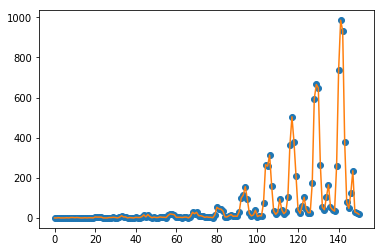

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['volume'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

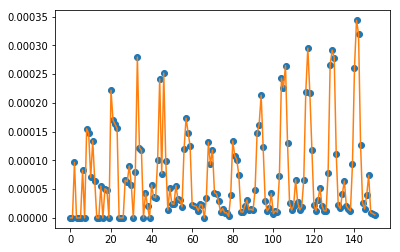

In [27]:
# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['intensity'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()